# Vega Lite Examples in Haskell - Single View Plots

The overview notebook - `VegaLiteGallery` - describes how 
[`hvega`](http://hackage.haskell.org/package/hvega)
is used to create Vega-Lite visualizations.

-----

## Table of Contents

This notebook represents the [Single View Plots](https://vega.github.io/vega-lite/examples/#single-view-plots)
section of the [Vega-Lite example gallery](https://vega.github.io/vega-lite/examples/).

### [Bar Charts and Histograms](#Bar-Charts-and-Histograms)

 - [Simple Bar Chart](#Simple-Bar-Chart)
 - [Aggregate Bar Chart](#Aggregate-Bar-Chart)
 - [Aggregate Bar Chart (Sorted)](#Aggregate-Bar-Chart-%28Sorted%29)
 - [Histogram](#Histogram)
 - [Histogram (from Binned Data)](#Histogram-%28from-Binned-Data%29)
 - [Log-scaled Histogram](#Log-scaled-Histogram)
 - [Grouped Bar Chart](#Grouped-Bar-Chart)
 - [Stacked Bar Chart](#Stacked-Bar-Chart)
 - [Horizontal Stacked Bar Chart](#Horizontal-Stacked-Bar-Chart)
 - [Normalized (Percentage) Stacked Bar Chart](#Normalized-%28Percentage%29-Stacked-Bar-Chart)
 - [Gantt Chart (Ranged Bar Marks)](#Gantt-Chart-%28Ranged-Bar-Marks%29)
 - [A bar chart encoding color names in the data](#A-bar-chart-encoding-color-names-in-the-data)
 - [Layered Bar Chart](#Layered-Bar-Chart)
 - [Diverging Stacked Bar Chart](#Diverging-Stacked-Bar-Chart)
 - [Simple Bar Chart With Labels](#Simple-Bar-Chart-With-Labels)
 - [Isotype Bar Chart](#Isotype-Bar-Chart)
 - [Isotype Bar Chart With Emoji](#Isotope-Bar-Chart-With-Emoji)

### [Scatter and Strip Plots](#Scatter-and-Strip-Plots)
 
 - [Scatterplot](#Scatterplot)
 - [Dot Plot](#Dot-Plot)
 - [Strip Plot](#Strip-Plot)
 - [Colored Scatterplot](#Colored-Scatterplot)
 - [Binned Scatterplot](#Binned-Scatterplot)
 - [Bubble Plot](#Bubble-Plot)
 - [Scatterplot with Null Values in Grey](#Scatterplot-with-Null-Values-in-Grey)
 - [Scatterplot with filled circles](#Scatterplot-with-filled-circles)
 - [Bubble Plot (Gapminder)](#Bubble-Plot-%28Gapminder%29)
 - [Bubble Plot (Natural Disasters)](#Natural-Disasters)
 - [Scatter Plot with Text Marks](#Scatter-Plot-with-Text-Marks)
 
### [Line Charts](#Line-Charts)
 
 - [Line Chart](#Line-Chart)
 - [Line Chart with Point Markers](#Line-Chart-with-Point-Markers)
 - [Line Chart with Stroked Point Markers](#Line-Chart-with-Stroked-Point-Markers)
 - [Multi Series Line Chart](#Multi-Series-Line-Chart)
 - [Slope Graph](#Slope-Graph)
 - [Step Chart](#Step-Chart)
 - [Line Chart with Monotone Interpolation](#Line-Chart-with-Monotone-Interpolation)
 - [Connected Scatterplot (Lines with Custom Paths)](#Connected-Scatterplot-%28Lines-with-Custom-Paths%29)
 - [Line Chart with Varying Size (using the trail mark)](#Line-Chart-with-Varying-Size-%28using-the-trail-mark%29)
 - [Line Chart with Markers and Invalid Values](#Line-Chart-with-Markers-and-Invalid-Values)
 - [Carbon Dioxide in the Atmosphere](#Carbon-Dioxide-in-the-Atmosphere)
 - [Line Charts Showing Ranks Over Times](#Line-Charts-Showing-Ranks-Over-Times)
 - [Drawing Sine and Cosine Curves with the Sequence Generator](#Drawing-Sine-and-Cosine-Curves-with-the-Sequence-Generator)

### [Area Charts and Streamgraphs](#Area-Charts-and-Streamgraphs)
 
 - [Area Chart](#Area-Chart)
 - [Area Chart with Overlaying Lines and Point Markers](#Area-Chart-with-Overlaying-Lines-and-Point-Markers)
 - [Stacked Area Chart](#Stacked-Area-Chart)
 - [Normalized Stacked Area Chart](#Normalized-Stacked-Area-Chart)
 - [Streamgraph](#Streamgraph)
 - [Horizon Graph](#Horizon-Graph)
 - [Mosaic Chart with Labels](#Mosaic-Chart-with-Labels)

### [Table-based Plots](#Table-based-Plots)

 - [Table Heatmap](#Table-Heatmap)
 - [Annual Weather Heatmap](#Annual-Weather-Heatmap)
 - [Table Binned Heatmap](#Table-Binned-Heatmap)
 - [Table Bubble Plot (Github Punch Card)](#Table-Bubble-Plot-%28Github-Punch-Card%29)
 - [Layering text over heatmap](#Layering-text-over-heatmap)

### [Advanced Calculations](#Advanced-Calculations)

 - [Calculate Percentage of Total](#Calculate-Percentage-of-Total)
 - [Calculate Difference from Average](#Calculate-Difference-from-Average)
 - [Calculate Difference from Annual Average](#Calculate-Difference-from-Annual-Average)
 - [Calculate Residuals](#Calculate-Residuals)
 - [Line Charts Showing Ranks over Time](#Line-Charts-Showing-Ranks-over-Time) (from the "Line Charts" section)
 - [Waterfall Chart of Monthly Profit and Loss](#Waterfall-Chart-of-Monthly-Profit-and-Loss)
 - [Filtering top-K items](#Filtering-top-K-items)
 - [Top-K plot with Others](#Top-K-plot-with-Others)
 - [Using the lookup transform to combine data](#Using-the-lookup-transform-to-combine-data)
 - [Cumulative Frequency Distribution](#Cumulative-Frequency-Distribution)
 - [Layered Histogram and Cumulative Histogram](#Layered-Histogram-and-Cumulative-Histogram)
 - [Parallel Coordinate Plot](#Parallel-Coorinate-Plot)
 - [Bar Chart showing Argmax Value](#Bar-Chart-showing-Argmax-Value)
 
---

## Versions

The notebook was last run with the following versions of [`hvega`](https://hackage.haskell.org/package/hvega) and
related modules:

In [1]:
:!ghc-pkg latest ghc
:!ghc-pkg latest ihaskell
:!ghc-pkg latest hvega
:!ghc-pkg latest ihaskell-hvega

ghc-8.4.4

ihaskell-0.9.1.0

hvega-0.4.0.0

ihaskell-hvega-0.2.0.3

As to when it was last run, how about:

In [2]:
import Data.Time (getCurrentTime)
getCurrentTime

2019-09-04 13:13:14.203842692 UTC

## Set up

See the overview notebook for an explanation of this section (it provides code I use to compate the `hvega` output
to the specification given in the Vega-Lite gallery).

In [3]:
{-# LANGUAGE OverloadedStrings #-}

-- VegaLite uses these names
import Prelude hiding (filter, lookup, repeat)

import Graphics.Vega.VegaLite

-- IHaskell automatically imports this if the `ihaskell-vega` module is installed
-- import IHaskell.Display.Hvega

-- If you are viewing this in an IHaskell notebook rather than Jupyter Lab,
-- use the following to see the visualizations
--
-- vlShow = id

In [4]:
{-# LANGUAGE QuasiQuotes #-}

import qualified Data.ByteString.Lazy.Char8 as BL8
import qualified Data.HashMap.Strict as HM
import qualified Data.Set as S

import Data.Aeson (Value(Object), encode)
import Data.Aeson.QQ.Simple (aesonQQ)
import Control.Monad (forM_, unless, when)
import Data.Maybe (fromJust)
import System.Directory (removeFile)
import System.Process (readProcess, readProcessWithExitCode)

validate ::
  VLSpec       -- ^ The expected specification
  -> VegaLite  -- ^ The actual visualization
  -> IO ()
validate exp vl = 
  let got = fromVL vl
      put = putStrLn
  in if got == exp
      then put "Okay"
      else do
        let red = "\x1b[31m"
            def = "\x1b[0m"
            
            report m = put (red ++ m ++ def)
            
        report "The visualization and expected specification do not match."
        
        -- assume both objects
        let Object oexp = exp
            Object ogot = got
            kexp = S.fromList (HM.keys oexp)
            kgot = S.fromList (HM.keys ogot)
            kmiss = S.toList (S.difference kexp kgot)
            kextra = S.toList (S.difference kgot kexp)
            keys = S.toList (S.intersection kexp kgot)
            
        unless (null kmiss && null kextra) $ do
          put ""
          report "Keys are different:"
          unless (null kmiss)  $ put ("  Missing: " ++ show kmiss)
          unless (null kextra) $ put ("  Extra  : " ++ show kextra)

        -- this often creates an impressive amount of text for what is
        -- only a small change, which is why it is followed by a call
        -- to debug
        --
        forM_ keys $ \key ->
          let vexp = fromJust (HM.lookup key oexp)
              vgot = fromJust (HM.lookup key ogot)
          in when (vexp /= vgot) $ do
            put ""
            report ("Values are different for " ++ show key)
            put ("  Expected: " ++ show vexp)
            put ("  Found   : " ++ show vgot)
          
        putStrLn ""
        report "The field-level differences are:"
        debug_ exp vl


-- Rather than come up with a way to diff JSON here, rely on `jq` and the trusty
-- `diff` command. This is not written to be robust!
--
debug_ spec vl = do
  let tostr = BL8.unpack . encode
  
  expected <- readProcess "jq" [] (tostr spec)
  got <- readProcess "jq" [] (tostr (fromVL vl))

  let f1 = "expected.json"
      f2 = "got.json"
      
  writeFile f1 expected
  writeFile f2 got
  
  let diffOpts = ["--minimal", f1, f2]
  (_, diff, _) <- readProcessWithExitCode "diff" diffOpts ""
  putStrLn diff
  
  forM_ [f1, f2] removeFile

We'll use the following in at least one example:

In [5]:
import qualified Data.Text as T

---

## Bar Charts and Histograms

 - [Simple Bar Chart](#Simple-Bar-Chart)
 - [Aggregate Bar Chart](#Aggregate-Bar-Chart)
 - [Aggregate Bar Chart (Sorted)](#Aggregate-Bar-Chart-%28Sorted%29)
 - [Histogram](#Histogram)
 - [Histogram (from Binned Data)](#Histogram-%28from-Binned-Data%29)
 - [Log-scaled Histogram](#Log-scaled-Histogram)
 - [Grouped Bar Chart](#Grouped-Bar-Chart)
 - [Stacked Bar Chart](#Stacked-Bar-Chart)
 - [Horizontal Stacked Bar Chart](#Horizontal-Stacked-Bar-Chart)
 - [Normalized (Percentage) Stacked Bar Chart](#Normalized-%28Percentage%29-Stacked-Bar-Chart)
 - [Gantt Chart (Ranged Bar Marks)](#Gantt-Chart-%28Ranged-Bar-Marks%29)
 - [A bar chart encoding color names in the data](#A-bar-chart-encoding-color-names-in-the-data)
 - [Layered Bar Chart](#Layered-Bar-Chart)
 - [Diverging Stacked Bar Chart](#Diverging-Stacked-Bar-Chart)
 - [Simple Bar Chart With Labels](#Simple-Bar-Chart-With-Labels)
 - [Isotype Bar Chart](#Isotype-Bar-Chart)
 - [Isotype Bar Chart With Emoji](#Isotope-Bar-Chart-With-Emoji)

---

### Simple Bar Chart

From https://vega.github.io/vega-lite/examples/bar.html

In [6]:
barFromColumnsSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
    "values": [
      {"a": "A", "b": 28}, {"a": "B", "b": 55}, {"a": "C", "b": 43},
      {"a": "D", "b": 91}, {"a": "E", "b": 81}, {"a": "F", "b": 53},
      {"a": "G", "b": 19}, {"a": "H", "b": 87}, {"a": "I", "b": 52}
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {"field": "a", "type": "ordinal"},
    "y": {"field": "b", "type": "quantitative"}
  }
}
|]

In [7]:
barFromColumns :: VegaLite
barFromColumns = 
    let desc = description "A simple bar chart with embedded data."
        dvals = dataFromColumns []
               . dataColumn "a" (Strings ["A", "B", "C", "D", "E", "F", "G", "H", "I"])
               . dataColumn "b" (Numbers [28, 55, 43, 91, 81, 53, 19, 87, 52])
         
        enc = encoding
              . position X [PName "a", PmType Ordinal]
              . position Y [PName "b", PmType Quantitative]

    in toVegaLite [desc, dvals [], mark Bar [], enc []]

A quick check to see if `hvega` matches the expected JSON:

In [8]:
validate barFromColumnsSpec barFromColumns

Okay

Now use Vega-Embed to view the visualization directly. This should be viewable as a PNG when viewing with a non-Javascript-enabled viewEr, at least for notebooks processed by Jupyter Lab, but appears to fail with IHaskell notebooks.

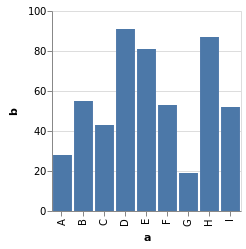

In [9]:
vlShow barFromColumns

Return to the [Table of Contents](#Table-of-Contents).

### Aggregate Bar Chart

From https://vega.github.io/vega-lite/examples/bar_aggregate.html

In [10]:
barAggregateSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A bar chart showing the US population distribution of age groups in 2000.",
  "data": { "url": "data/population.json"},
  "transform": [{"filter": "datum.year == 2000"}],
  "mark": "bar",
  "encoding": {
    "y": {
      "field": "age", "type": "ordinal",
      "scale": {"rangeStep": 17}
    },
    "x": {
      "aggregate": "sum", "field": "people", "type": "quantitative",
      "axis": {"title": "population"}
    }
  }
}
|]

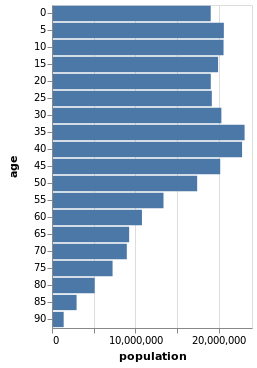

In [11]:
barAggregate =
    let desc = "A bar chart showing the US population distribution of age groups in 2000."
    
        -- Local file access appears problematic in Jupyter notebooks but seems to
        -- work fine in Jupyter Lab sessions.
        --
        dvals = dataFromUrl "data/population.json" []
        
        trans = transform (filter (FExpr "datum.year == 2000") [])
        enc = encoding
                 . position Y [ PName "age", PmType Ordinal
                              , PScale [SRangeStep (Just 17)]
                              ]
                 . position X [ PName "people", PmType Quantitative
                              , PAggregate Sum
                              , PAxis [AxTitle "population"]
                              ]
    in toVegaLite [description desc, dvals, trans, mark Bar [], enc []]
       
vlShow barAggregate

In [12]:
validate barAggregateSpec barAggregate

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Aggregate Bar Chart (Sorted)

From https://vega.github.io/vega-lite/examples/bar_aggregate_sort_by_encoding.html

In [13]:
barAggregateSortedSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A bar chart that sorts the y-values by the x-values.",
  "data": {"url": "data/population.json"},
  "transform": [{"filter": "datum.year == 2000"}],
  "mark": "bar",
  "encoding": {
    "y": {
      "field": "age",
      "type": "ordinal",
      "scale": {"rangeStep": 17},
      "sort": {"encoding": "x"}
    },
    "x": {
      "aggregate": "sum",
      "field": "people",
      "type": "quantitative",
      "axis": {"title": "population"}
    }
  }
}
|]

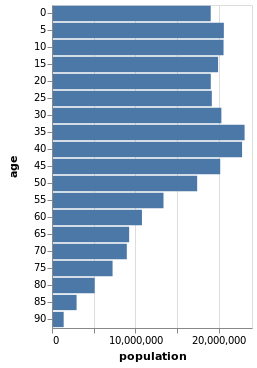

In [14]:
barAggregateSorted =
    let desc = "A bar chart that sorts the y-values by the x-values."
        dvals = dataFromUrl "data/population.json" []
        
        trans = transform (filter (FExpr "datum.year == 2000") [])
        enc = encoding
                 . position Y [ PName "age", PmType Ordinal
                              , PScale [SRangeStep (Just 17)]
                              , PSort [ByChannel ChX]
                              ]
                 . position X [ PName "people", PmType Quantitative
                              , PAggregate Sum
                              , PAxis [AxTitle "population"]
                              ]
    in toVegaLite [description desc, dvals, trans, mark Bar [], enc []]
       
vlShow barAggregateSorted

In [15]:
validate barAggregateSortedSpec barAggregateSorted

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Histogram

From https://vega.github.io/vega-lite/examples/histogram.html

In [16]:
histogramSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/movies.json"},
  "mark": "bar",
  "encoding": {
    "x": {
      "bin": true,
      "field": "IMDB_Rating",
      "type": "quantitative"
    },
    "y": {
      "aggregate": "count",
      "type": "quantitative"
    }
  }
}
|]

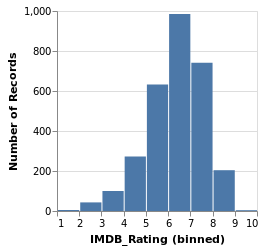

In [17]:
histogram = 
    let dvals = dataFromUrl "data/movies.json" []
        enc = encoding
                 . position Y [ PAggregate Count, PmType Quantitative]
                 . position X [ PName "IMDB_Rating", PmType Quantitative
                              , PBin []
                              ]
    in toVegaLite [dvals, mark Bar [], enc []]

vlShow histogram

In [18]:
validate histogramSpec histogram

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Histogram (from Binned Data)

From https://vega.github.io/vega-lite/examples/bar_binned_data.html

In [19]:
histogramBinnedSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {
    "values": [
      {"bin_start": 8, "bin_end": 10, "count": 7},
      {"bin_start": 10, "bin_end": 12, "count": 29},
      {"bin_start": 12, "bin_end": 14, "count": 71},
      {"bin_start": 14, "bin_end": 16, "count": 127},
      {"bin_start": 16, "bin_end": 18, "count": 94},
      {"bin_start": 18, "bin_end": 20, "count": 54},
      {"bin_start": 20, "bin_end": 22, "count": 17},
      {"bin_start": 22, "bin_end": 24, "count": 5}
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "bin_start",
      "bin": {
        "binned": true,
        "step": 2
      },
      "type": "quantitative"
    },
    "x2": {"field": "bin_end"},
    "y": {
      "field": "count",
      "type": "quantitative"
    }
  }
}
|]

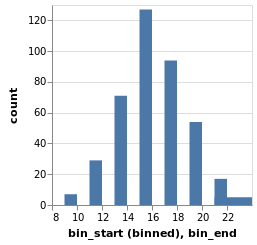

In [20]:
histogramBinned = 
  let dvals = dataFromRows []
                . mkRow 8 7
                . mkRow 10 29
                . mkRow 12 71
                . mkRow 14 127
                . mkRow 16 94
                . mkRow 18 54
                . mkRow 20 17
                . mkRow 22 5
                
      mkRow start count = dataRow [ ("bin_start", Number start)
                                  , ("bin_end", Number (start + 2))
                                  , ("count", Number count) ]
                          
      enc = encoding
              . position X [ PName "bin_start", PmType Quantitative
                           , PBin [AlreadyBinned True, Step 2]
                           ]
              . position X2 [ PName "bin_end" ]
              . position Y [PName "count", PmType Quantitative]
                           
  in toVegaLite [dvals [], mark Bar [], enc []]
  
vlShow histogramBinned

In [21]:
validate histogramBinnedSpec histogramBinned

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Log-scaled Histogram

From https://vega.github.io/vega-lite/examples/histogram_log.html

In [22]:
histogramLogScaleSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Log-scaled Histogram.  We may improve the support of this. See https://github.com/vega/vega-lite/issues/4792.",
  "data": {
    "values": [
      {"x": 0.01},
      {"x": 0.1},
      {"x": 1},
      {"x": 1},
      {"x": 1},
      {"x": 1},
      {"x": 10},
      {"x": 10},
      {"x": 100},
      {"x": 500},
      {"x": 800}
    ]
  },
  "transform": [{
      "calculate": "log(datum.x)/log(10)", "as": "log_x"
  }, {
      "bin": true,
      "field": "log_x",
      "as": "bin_log_x"
  }, {
    "calculate": "pow(10, datum.bin_log_x)", "as": "x1"
  }, {
    "calculate": "pow(10, datum.bin_log_x_end)", "as": "x2"
  }],
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "x1",
      "type": "quantitative",
      "scale": {"type": "log", "base": 10},
      "axis": {"tickCount": 5}
    },
    "x2": {
      "field": "x2"
    },
    "y": {
      "aggregate": "count",
      "type": "quantitative"
    }
  }
}
|]

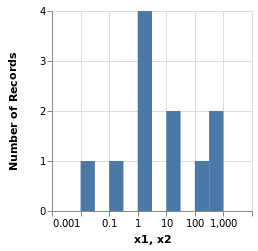

In [23]:
histogramLogScale =
    let desc = "Log-scaled Histogram.  We may improve the support of this. See https://github.com/vega/vega-lite/issues/4792."
    
        xs = [0.01, 0.1, 1, 1, 1, 1, 10, 10, 100, 500, 800]
        dvals = dataFromColumns [] 
                  . dataColumn "x" (Numbers xs)

        trans = transform
                  . calculateAs "log(datum.x)/log(10)" "log_x"
                  -- Note that an empty array to binAs means setting "bin" to true
                  . binAs [] "log_x" "bin_log_x"
                  . calculateAs "pow(10, datum.bin_log_x)" "x1"
                  . calculateAs "pow(10, datum.bin_log_x_end)" "x2"

        enc = encoding
                . position X [ PName "x1", PmType Quantitative
                             , PScale [SType ScLog, SBase 10]
                             , PAxis [AxTickCount 5] ]
                . position X2 [ PName "x2" ]
                . position Y [ PAggregate Count, PmType Quantitative]
                
    in toVegaLite [description desc, dvals [], trans [], mark Bar [], enc []]
    
vlShow histogramLogScale

In [24]:
validate histogramLogScaleSpec histogramLogScale

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Grouped Bar Chart

From https://vega.github.io/vega-lite/examples/bar_grouped.html

In [25]:
barGroupedSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": { "url": "data/population.json"},
  "transform": [
    {"filter": "datum.year == 2000"},
    {"calculate": "datum.sex == 2 ? 'Female' : 'Male'", "as": "gender"}
  ],
  "spacing": 10,
  "mark": "bar",
  "encoding": {
    "column": {
      "field": "age", "type": "ordinal"
    },
    "y": {
      "aggregate": "sum", "field": "people", "type": "quantitative",
      "axis": {"title": "population", "grid": false}
    },
    "x": {
      "field": "gender", "type": "nominal",
      "scale": {"rangeStep": 12},
      "axis": {"title": ""}
    },
    "color": {
      "field": "gender", "type": "nominal",
      "scale": {"range": ["#EA98D2", "#659CCA"]}
    }
  },
  "config": {
    "view": {"stroke": "transparent"},
    "axis": {"domainWidth": 1}
  }
}
|]

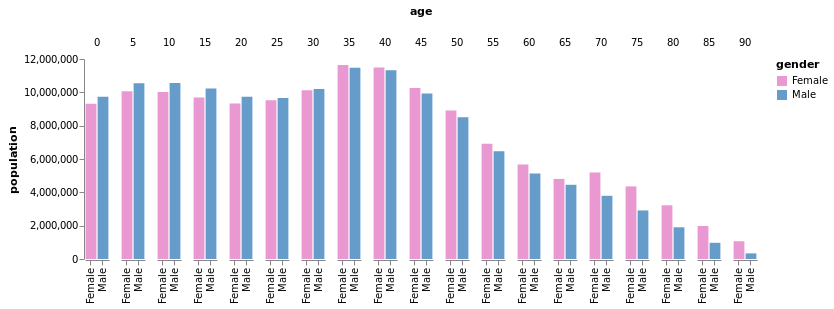

In [26]:
barGrouped =
    let dvals = dataFromUrl "data/population.json"
           
        trans = transform 
                   . filter (FExpr "datum.year == 2000")
                   . calculateAs "datum.sex == 2 ? 'Female' : 'Male'" "gender"

        enc = encoding
                 . column [FName "age", FmType Ordinal]
                 . position Y [ PName "people", PmType Quantitative, PAggregate Sum,
                                PAxis [AxTitle "population", AxGrid False]
                              ]
                 . position X [ PName "gender", PmType Nominal
                              , PScale [SRangeStep (Just 12)]
                              , PAxis [AxTitle ""]
                              ]
                 . color [ MName "gender", MmType Nominal, MScale [SRange (RStrings ["#EA98D2", "#659CCA"])] ]
        
        -- prior to version 0.4.0.0 of hvega, Stroke was used instead of ViewStroke
        config = configure
                    . configuration (View [ViewStroke (Just "transparent")])
                    . configuration (Axis [DomainWidth 1])
           
    in toVegaLite [dvals [], trans [], spacing 10, mark Bar [], enc [], config []]
       
vlShow barGrouped

In [27]:
validate barGroupedSpec barGrouped

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Stacked Bar Chart

From https://vega.github.io/vega-lite/examples/stacked_bar_weather.html

In [28]:
stackedBarWeatherSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/seattle-weather.csv"},
  "mark": "bar",
  "encoding": {
    "x": {
      "timeUnit": "month",
      "field": "date",
      "type": "ordinal",
      "axis": {"title": "Month of the year"}
    },
    "y": {
      "aggregate": "count",
      "type": "quantitative"
    },
    "color": {
      "field": "weather",
      "type": "nominal",
      "scale": {
        "domain": ["sun","fog","drizzle","rain","snow"],
        "range": ["#e7ba52","#c7c7c7","#aec7e8","#1f77b4","#9467bd"]
      },
      "legend": {"title": "Weather type"}
    }
  }
}
|]

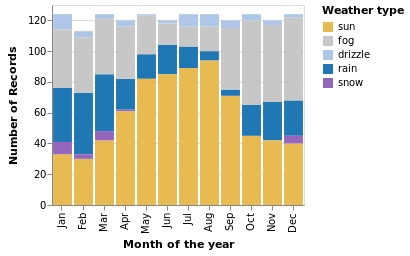

In [29]:
stackedBarWeather =
    let dvals = dataFromUrl "data/seattle-weather.csv"
           
        cmap = categoricalDomainMap [ ("sun", "#e7ba52")
                                    , ("fog", "#c7c7c7")
                                    , ("drizzle", "#aec7e8")
                                    , ("rain", "#1f77b4")
                                    , ("snow", "#9467bd")
                                    ]

        enc = encoding
                 . position X [ PName "date", PmType Ordinal, PTimeUnit Month
                              , PAxis [AxTitle "Month of the year"]]
                 . position Y [PAggregate Count, PmType Quantitative]
                 . color [ MName "weather", MmType Nominal
                         , MScale cmap
                         , MLegend [LTitle "Weather type"]
                         ]
                 
    in toVegaLite [dvals [], mark Bar [], enc []]
       
vlShow stackedBarWeather

In [30]:
validate stackedBarWeatherSpec stackedBarWeather

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Horizontal Stacked Bar Chart

From https://vega.github.io/vega-lite/examples/stacked_bar_h.html

In [31]:
stackedBarHSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/barley.json"},
  "mark": "bar",
  "encoding": {
    "x": {"aggregate": "sum", "field": "yield", "type": "quantitative"},
    "y": {"field": "variety", "type": "nominal"},
    "color": {"field": "site", "type": "nominal"}
  }
}
|]

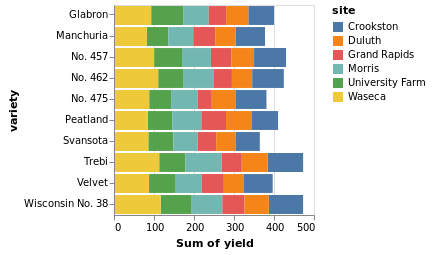

In [32]:
stackedBarH =
    let dvals = dataFromUrl "data/barley.json"

        enc = encoding
                 . position X [PName "yield", PmType Quantitative, PAggregate Sum]
                 . position Y [PName "variety", PmType Nominal]
                 . color [MName "site", MmType Nominal]
                 
    in toVegaLite [dvals [], mark Bar [], enc []]
       
vlShow stackedBarH

In [33]:
validate stackedBarHSpec stackedBarH

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Normalized (Percentage) Stacked Bar Chart

From https://vega.github.io/vega-lite/examples/stacked_bar_normalize.html

In [34]:
stackedBarNormalizeSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": { "url": "data/population.json"},
  "transform": [
    {"filter": "datum.year == 2000"},
    {"calculate": "datum.sex == 2 ? 'Female' : 'Male'", "as": "gender"}
  ],
  "mark": "bar",
  "encoding": {
    "y": {
      "aggregate": "sum", "field": "people", "type": "quantitative",
      "axis": {"title": "population"},
      "stack":  "normalize"
    },
    "x": {
      "field": "age", "type": "ordinal",
      "scale": {"rangeStep": 17}
    },
    "color": {
      "field": "gender", "type": "nominal",
      "scale": {"range": ["#EA98D2", "#659CCA"]}
    }
  }
}
|]

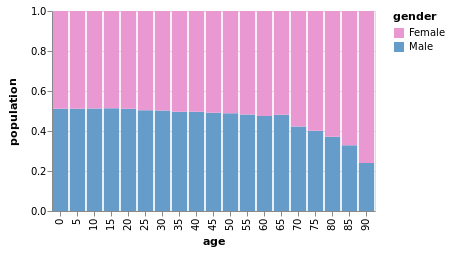

In [35]:
stackedBarNormalize =
    let dvals = dataFromUrl "data/population.json"
           
        trans = transform
                   . filter (FExpr "datum.year == 2000")
                   . calculateAs "datum.sex == 2 ? 'Female' : 'Male'" "gender"
                   
        enc = encoding
                 . position Y [ PName "people", PmType Quantitative, PAggregate Sum
                              , PStack StNormalize
                              , PAxis [AxTitle "population"] 
                              ]
                 . position X [ PName "age", PmType Ordinal
                              , PScale [SRangeStep (Just 17)]
                              ]
                 . color [ MName "gender", MmType Nominal
                         , MScale [SRange (RStrings ["#EA98D2", "#659CCA"])]
                         ]
                 
    in toVegaLite [dvals [], trans [], mark Bar [], enc []]
       
vlShow stackedBarNormalize

In [36]:
validate stackedBarNormalizeSpec stackedBarNormalize

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Gantt Chart (Ranged Bar Marks)

From https://vega.github.io/vega-lite/examples/bar_gantt.html

In [37]:
barGanttSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A simple bar chart with ranged data (aka Gantt Chart).",
  "data": {
    "values": [
      {"task": "A","start": 1, "end": 3},
      {"task": "B","start": 3, "end": 8},
      {"task": "C","start": 8, "end": 10}
    ]
  },
  "mark": "bar",
  "encoding": {
    "y": {"field": "task", "type": "ordinal"},
    "x": {"field": "start", "type": "quantitative"},
    "x2": {"field": "end"}
  }
}
|]

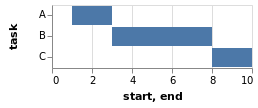

In [38]:
barGantt =
    let desc = "A simple bar chart with ranged data (aka Gantt Chart)."

        dvals = dataFromColumns []
                   . dataColumn "task" (Strings ["A", "B", "C"])
                   . dataColumn "start" (Numbers [1, 3, 8])
                   . dataColumn "end" (Numbers [3, 8, 10])
           
        enc = encoding
                 . position Y [PName "task", PmType Ordinal]
                 . position X [PName "start", PmType Quantitative]
                 . position X2 [PName "end"]
                 
    in toVegaLite [description desc, dvals [], mark Bar [], enc []]
       
vlShow barGantt

In [39]:
validate barGanttSpec barGantt

Okay

Return to the [Table of Contents](#Table-of-Contents).

### A bar chart encoding color names in the data

From https://vega.github.io/vega-lite/examples/bar_color_disabled_scale.html

In [40]:
barColorDisabledScaleSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A bar chart that directly encodes color names in the data.",
  "data": {
    "values": [
      {
        "color": "red",
        "b": 28
      },
      {
        "color": "green",
        "b": 55
      },
      {
        "color": "blue",
        "b": 43
      }
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "color",
      "type": "nominal"
    },
    "y": {
      "field": "b",
      "type": "quantitative"
    },
    "color": {
      "field": "color",
      "type": "nominal",
      "scale": null
    }
  }
}
|]

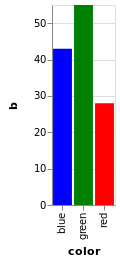

In [41]:
barColorDisabledScale =
    let desc = description "A bar chart that directly encodes color names in the data."
        dvals = dataFromColumns []
                   . dataColumn "color" (Strings ["red", "green", "blue"])
                   . dataColumn "b" (Numbers [28, 55, 43])
         
        enc = encoding
                . position X [PName "color", PmType Nominal]
                . position Y [PName "b", PmType Quantitative]
                . color [MName "color", MmType Nominal, MScale []]
                
    in toVegaLite [desc, dvals [], mark Bar [], enc []]

vlShow barColorDisabledScale

In [42]:
validate barColorDisabledScaleSpec barColorDisabledScale

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Layered Bar Chart

From https://vega.github.io/vega-lite/examples/bar_layered_transparent.html

In [43]:
barLayeredTransparentSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A bar chart showing the US population distribution of age groups and gender in 2000.",
  "data": { "url": "data/population.json"},
  "transform": [
    {"filter": "datum.year == 2000"},
    {"calculate": "datum.sex == 2 ? 'Female' : 'Male'", "as": "gender"}
  ],
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "age", "type": "ordinal",
      "scale": {"rangeStep": 17}
    },
    "y": {
      "aggregate": "sum", "field": "people", "type": "quantitative",
      "axis": {"title": "population"},
      "stack": null
    },
    "color": {
      "field": "gender", "type": "nominal",
      "scale": {"range": ["#e377c2", "#1f77b4"]}
    },
    "opacity": {"value": 0.7}
  }
}
|]

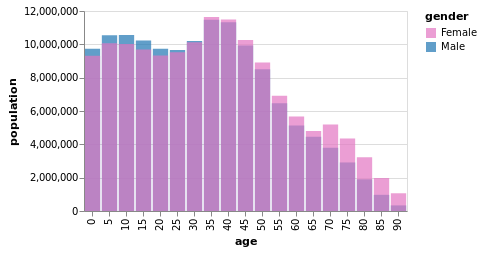

In [44]:
barLayeredTransparent =
    let dvals = dataFromUrl "data/population.json"
        desc = "A bar chart showing the US population distribution of age groups and gender in 2000."
           
        trans = transform 
                   . filter (FExpr "datum.year == 2000")
                   . calculateAs "datum.sex == 2 ? 'Female' : 'Male'" "gender"

        enc = encoding
                 . position X [ PName "age", PmType Ordinal
                              , PScale [SRangeStep (Just 17)]
                              ]
                 . position Y [ PName "people", PmType Quantitative, PAggregate Sum
                              , PStack NoStack
                              , PAxis [AxTitle "population"]
                              ]
                 . color [ MName "gender", MmType Nominal
                         , MScale [SRange (RStrings ["#e377c2", "#1f77b4"])]
                         ]
                 . opacity [MNumber 0.7]
           
    in toVegaLite [ description desc, dvals [], trans []
                  , mark Bar [], enc []
                  ]
       
vlShow barLayeredTransparent

In [45]:
validate barLayeredTransparentSpec barLayeredTransparent

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Diverging Stacked Bar Chart (with Neutral Parts)

From https://vega.github.io/vega-lite/examples/bar_diverging_stack_transform.html - the Vega-Lite version 2 is at
https://vega.github.io/vega-lite/examples/bar_diverging_stacked.html which contains the pre-computed values, rather than
calculating them as part of the visualization.

In [46]:
barDivergingStackTransformSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A diverging stacked bar chart for sentiments towards a set of eight questions, displayed as percentages with neutral responses straddling the 0% mark",
  "data": {
    "values": [
      {"question": "Question 1", "type": "Strongly disagree", "value": 24, "percentage": 0.7},
      {"question": "Question 1", "type": "Disagree", "value": 294, "percentage": 9.1},
      {"question": "Question 1", "type": "Neither agree nor disagree", "value": 594, "percentage": 18.5},
      {"question": "Question 1", "type": "Agree", "value": 1927, "percentage": 59.9},
      {"question": "Question 1", "type": "Strongly agree", "value": 376, "percentage": 11.7},
      {"question": "Question 2", "type": "Strongly disagree", "value": 2, "percentage": 18.2},
      {"question": "Question 2", "type": "Disagree", "value": 2, "percentage": 18.2},
      {"question": "Question 2", "type": "Neither agree nor disagree", "value": 0, "percentage": 0},
      {"question": "Question 2", "type": "Agree", "value": 7, "percentage": 63.6},
      {"question": "Question 2", "type": "Strongly agree", "value": 11, "percentage": 0},
      {"question": "Question 3", "type": "Strongly disagree", "value": 2, "percentage": 20},
      {"question": "Question 3", "type": "Disagree", "value": 0, "percentage": 0},
      {"question": "Question 3", "type": "Neither agree nor disagree", "value": 2, "percentage": 20},
      {"question": "Question 3", "type": "Agree", "value": 4, "percentage": 40},
      {"question": "Question 3", "type": "Strongly agree", "value": 2, "percentage": 20},
      {"question": "Question 4", "type": "Strongly disagree", "value": 0, "percentage": 0},
      {"question": "Question 4", "type": "Disagree", "value": 2, "percentage": 12.5},
      {"question": "Question 4", "type": "Neither agree nor disagree", "value": 1, "percentage": 6.3},
      {"question": "Question 4", "type": "Agree", "value": 7, "percentage": 43.8},
      {"question": "Question 4", "type": "Strongly agree", "value": 6, "percentage": 37.5},
      {"question": "Question 5", "type": "Strongly disagree", "value": 0, "percentage": 0},
      {"question": "Question 5", "type": "Disagree", "value": 1, "percentage": 4.2},
      {"question": "Question 5", "type": "Neither agree nor disagree", "value": 3, "percentage": 12.5},
      {"question": "Question 5", "type": "Agree", "value": 16, "percentage": 66.7},
      {"question": "Question 5", "type": "Strongly agree", "value": 4, "percentage": 16.7},
      {"question": "Question 6", "type": "Strongly disagree", "value": 1, "percentage": 6.3},
      {"question": "Question 6", "type": "Disagree", "value": 1, "percentage": 6.3},
      {"question": "Question 6", "type": "Neither agree nor disagree", "value": 2, "percentage": 12.5},
      {"question": "Question 6", "type": "Agree", "value": 9, "percentage": 56.3},
      {"question": "Question 6", "type": "Strongly agree", "value": 3, "percentage": 18.8},
      {"question": "Question 7", "type": "Strongly disagree", "value": 0, "percentage": 0},
      {"question": "Question 7", "type": "Disagree", "value": 0, "percentage": 0},
      {"question": "Question 7", "type": "Neither agree nor disagree", "value": 1, "percentage": 20},
      {"question": "Question 7", "type": "Agree", "value": 4, "percentage": 80},
      {"question": "Question 7", "type": "Strongly agree", "value": 0, "percentage": 0},
      {"question": "Question 8", "type": "Strongly disagree", "value": 0, "percentage": 0},
      {"question": "Question 8", "type": "Disagree", "value": 0, "percentage": 0},
      {"question": "Question 8", "type": "Neither agree nor disagree", "value": 0, "percentage": 0},
      {"question": "Question 8", "type": "Agree", "value": 0, "percentage": 0},
      {"question": "Question 8", "type": "Strongly agree", "value": 2, "percentage": 100}
    ]
  },
  "transform": [
    {
      "calculate": "if(datum.type === 'Strongly disagree',-2,0) + if(datum.type==='Disagree',-1,0) + if(datum.type =='Neither agree nor disagree',0,0) + if(datum.type ==='Agree',1,0) + if(datum.type ==='Strongly agree',2,0)",
      "as": "q_order"
    },
    {
      "calculate": "if(datum.type === 'Disagree' || datum.type === 'Strongly disagree', datum.percentage,0) + if(datum.type === 'Neither agree nor disagree', datum.percentage / 2,0)",
      "as": "signed_percentage"
    },
    {"stack": "percentage", "as": ["v1", "v2"], "groupby": ["question"]},
    {
      "joinaggregate": [
        {
          "field": "signed_percentage",
          "op": "sum",
          "as": "offset"
        }
      ],
      "groupby": ["question"]
    },
    {"calculate": "datum.v1 - datum.offset", "as": "nx"},
    {"calculate": "datum.v2 - datum.offset", "as": "nx2"}
  ],
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "nx",
      "type": "quantitative",
      "axis": {
        "title": "Percentage"
      }
    },
    "x2": {"field": "nx2"},
    "y": {
      "field": "question",
      "type": "nominal",
      "axis": {
        "title": "Question",
        "offset": 5,
        "ticks": false,
        "minExtent": 60,
        "domain": false
      }
    },
    "color": {
      "field": "type",
      "type": "nominal",
      "legend": {
        "title": "Response"
      },
      "scale": {
        "domain": ["Strongly disagree", "Disagree", "Neither agree nor disagree", "Agree", "Strongly agree"],
        "range": ["#c30d24", "#f3a583", "#cccccc", "#94c6da", "#1770ab"],
        "type": "ordinal"
      }
    }
  }
}
|]

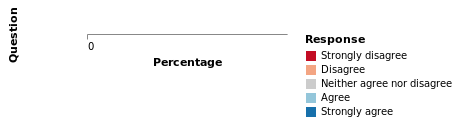

In [47]:
data Answer = SDis | Dis | Meh | Agr | SAgr

toAnswer SDis = "Strongly disagree"
toAnswer Dis = "Disagree"
toAnswer Meh = "Neither agree nor disagree"
toAnswer Agr = "Agree"
toAnswer SAgr = "Strongly agree"

barDivergingStackTransform =
    let desc = "A diverging stacked bar chart for sentiments towards a set of eight questions, displayed as percentages with neutral responses straddling the 0% mark"
        dvals = dataFromRows []
                   . qus "1" SDis 24 0.7
                   . qus "1" Dis 294 9.1
                   . qus "1" Meh 594 18.5
                   . qus "1" Agr 1927 59.9
                   . qus "1" SAgr 376 11.7
                   . qus "2" SDis 2 18.2
                   . qus "2" Dis 2 18.2
                   . qus "2" Meh 0 0 
                   . qus "2" Agr 7 63.6
                   . qus "2" SAgr 11 0
                   . qus "3" SDis 2 20
                   . qus "3" Dis 0 0
                   . qus "3" Meh 2 20 
                   . qus "3" Agr 4 40
                   . qus "3" SAgr 2 20
                   . qus "4" SDis 0 0
                   . qus "4" Dis 2 12.5
                   . qus "4" Meh 1 6.3
                   . qus "4" Agr 7 43.8
                   . qus "4" SAgr 6 37.5
                   . qus "5" SDis 0 0
                   . qus "5" Dis 1 4.2
                   . qus "5" Meh 3 12.5
                   . qus "5" Agr 16 66.7
                   . qus "5" SAgr 4 16.7
                   . qus "6" SDis 1 6.3
                   . qus "6" Dis 1 6.3
                   . qus "6" Meh 2 12.5
                   . qus "6" Agr 9 56.3
                   . qus "6" SAgr 3 18.8
                   . qus "7" SDis 0 0
                   . qus "7" Dis 0 0
                   . qus "7" Meh 1 20
                   . qus "7" Agr 4 80
                   . qus "7" SAgr 0 0
                   . qus "8" SDis 0 0
                   . qus "8" Dis 0 0
                   . qus "8" Meh 0 0
                   . qus "8" Agr 0 0
                   . qus "8" SAgr 2 100

        qus n = rval ("Question " <> n)
        rval q t v p = dataRow [ ("question", Str q), ("type", Str (toAnswer t)), ("value", Number v)
                               , ("percentage", Number p)
                               ]

        trans = transform
                  . calculateAs "if(datum.type === 'Strongly disagree',-2,0) + if(datum.type==='Disagree',-1,0) + if(datum.type =='Neither agree nor disagree',0,0) + if(datum.type ==='Agree',1,0) + if(datum.type ==='Strongly agree',2,0)"
                                "q_order"
                  . calculateAs "if(datum.type === 'Disagree' || datum.type === 'Strongly disagree', datum.percentage,0) + if(datum.type === 'Neither agree nor disagree', datum.percentage / 2,0)"
                                "signed_percentage"
                  . stack "percentage" ["question"] "v1" "v2" []
                  . joinAggregate [opAs Sum "signed_percentage" "offset"]
                                  [WGroupBy ["question"]]
                  . calculateAs "datum.v1 - datum.offset" "nx"
                  . calculateAs "datum.v2 - datum.offset" "nx2"

        cmap = categoricalDomainMap [ (toAnswer SDis, "#c30d24")
                                    , (toAnswer Dis, "#f3a583")
                                    , (toAnswer Meh, "#cccccc")
                                    , (toAnswer Agr, "#94c6da")
                                    , (toAnswer SAgr, "#1770ab")
                                    ]
           
        enc = encoding
                . position X [PName "nx", PmType Quantitative, PAxis [AxTitle "Percentage"]]
                . position X2 [PName "nx2"]
                . position Y [ PName "question", PmType Nominal
                             , PAxis [AxTitle "Question", AxOffset 5, AxTicks False, AxMinExtent 60, AxDomain False]
                             ]
                . color [ MName "type", MmType Nominal
                        , MLegend [LTitle "Response"]
                        , MScale (SType ScOrdinal : cmap)
                        ]

    in toVegaLite [description desc, dvals [], trans [], mark Bar [], enc []]

vlShow barDivergingStackTransform

In [48]:
validate barDivergingStackTransformSpec barDivergingStackTransform

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Simple Bar Chart With Labels

From https://vega.github.io/vega-lite/examples/layer_bar_labels.html

In [49]:
layerBarLabelsSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {
    "values": [
      {"a": "A","b": 28},
      {"a": "B","b": 55},
      {"a": "C","b": 43}
    ]
  },
  "encoding": {
    "y": {"field": "a", "type": "ordinal"},
    "x": {"field": "b", "type": "quantitative"}
  },
  "layer": [{
    "mark": "bar"
  }, {
    "mark": {
      "type": "text",
      "align": "left",
      "baseline": "middle",
      "dx": 3
    },
    "encoding": {
      "text": {"field": "b", "type": "quantitative"}
    }
  }]
}
|]

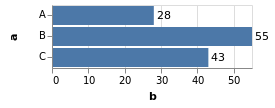

In [50]:
layerBarLabels =
    let dvals = dataFromRows []
                   . dataRow [("a", Str "A"), ("b", Number 28)]
                   . dataRow [("a", Str "B"), ("b", Number 55)]
                   . dataRow [("a", Str "C"), ("b", Number 43)]

        enc = encoding
                 . position X [PName "b", PmType Quantitative]
                 . position Y [PName "a", PmType Ordinal]
                 
        encT = encoding
                 . text [TName "b", TmType Quantitative]

        lyr1 = asSpec [mark Bar []]
        lyr2 = asSpec [ mark Text [ MAlign AlignLeft
                                  , MBaseline AlignMiddle, MdX 3 ]
                      , encT [] ]

    in toVegaLite [dvals [], enc [], layer [lyr1, lyr2]]

vlShow layerBarLabels

In [51]:
validate layerBarLabelsSpec layerBarLabels

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Isotype Bar Chart

From https://vega.github.io/vega-lite/examples/isotype_bar_chart.html

In [52]:
isotypeBarChartSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "config": {"view": {"stroke": ""}},
  "width": 800,
  "height": 200,
  "data": {
    "values": [
      {"country": "Great Britain", "animal": "cattle", "col": 3},
      {"country": "Great Britain", "animal": "cattle", "col": 2},
      {"country": "Great Britain", "animal": "cattle", "col": 1},
      {"country": "Great Britain", "animal": "pigs", "col": 2},
      {"country": "Great Britain", "animal": "pigs", "col": 1},
      {"country": "Great Britain", "animal": "sheep", "col": 10},
      {"country": "Great Britain", "animal": "sheep", "col": 9},
      {"country": "Great Britain", "animal": "sheep", "col": 8},
      {"country": "Great Britain", "animal": "sheep", "col": 7},
      {"country": "Great Britain", "animal": "sheep", "col": 6},
      {"country": "Great Britain", "animal": "sheep", "col": 5},
      {"country": "Great Britain", "animal": "sheep", "col": 4},
      {"country": "Great Britain", "animal": "sheep", "col": 3},
      {"country": "Great Britain", "animal": "sheep", "col": 2},
      {"country": "Great Britain", "animal": "sheep", "col": 1},
      {"country": "United States", "animal": "cattle", "col": 9},
      {"country": "United States", "animal": "cattle", "col": 8},
      {"country": "United States", "animal": "cattle", "col": 7},
      {"country": "United States", "animal": "cattle", "col": 6},
      {"country": "United States", "animal": "cattle", "col": 5},
      {"country": "United States", "animal": "cattle", "col": 4},
      {"country": "United States", "animal": "cattle", "col": 3},
      {"country": "United States", "animal": "cattle", "col": 2},
      {"country": "United States", "animal": "cattle", "col": 1},
      {"country": "United States", "animal": "pigs", "col": 6},
      {"country": "United States", "animal": "pigs", "col": 5},
      {"country": "United States", "animal": "pigs", "col": 4},
      {"country": "United States", "animal": "pigs", "col": 3},
      {"country": "United States", "animal": "pigs", "col": 2},
      {"country": "United States", "animal": "pigs", "col": 1},
      {"country": "United States", "animal": "sheep", "col": 7},
      {"country": "United States", "animal": "sheep", "col": 6},
      {"country": "United States", "animal": "sheep", "col": 5},
      {"country": "United States", "animal": "sheep", "col": 4},
      {"country": "United States", "animal": "sheep", "col": 3},
      {"country": "United States", "animal": "sheep", "col": 2},
      {"country": "United States", "animal": "sheep", "col": 1}
    ]
  },
  "mark": {"type": "point", "filled": true},
  "encoding": {
    "x": {"field": "col", "type": "ordinal", "axis": null},
    "y": {"field": "animal", "type": "ordinal", "axis": null},
    "row": {"field": "country", "type": "nominal", "header": {"title": ""}},
    "shape": {
      "field": "animal",
      "type": "nominal",
      "scale": {
        "domain": ["person", "cattle", "pigs", "sheep"],
        "range": [
          "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 -0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 -0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 -0.6 -0.4 -0.6z",
          "M4 -2c0 0 0.9 -0.7 1.1 -0.8c0.1 -0.1 -0.1 0.5 -0.3 0.7c-0.2 0.2 1.1 1.1 1.1 1.2c0 0.2 -0.2 0.8 -0.4 0.7c-0.1 0 -0.8 -0.3 -1.3 -0.2c-0.5 0.1 -1.3 1.6 -1.5 2c-0.3 0.4 -0.6 0.4 -0.6 0.4c0 0.1 0.3 1.7 0.4 1.8c0.1 0.1 -0.4 0.1 -0.5 0c0 0 -0.6 -1.9 -0.6 -1.9c-0.1 0 -0.3 -0.1 -0.3 -0.1c0 0.1 -0.5 1.4 -0.4 1.6c0.1 0.2 0.1 0.3 0.1 0.3c0 0 -0.4 0 -0.4 0c0 0 -0.2 -0.1 -0.1 -0.3c0 -0.2 0.3 -1.7 0.3 -1.7c0 0 -2.8 -0.9 -2.9 -0.8c-0.2 0.1 -0.4 0.6 -0.4 1c0 0.4 0.5 1.9 0.5 1.9l-0.5 0l-0.6 -2l0 -0.6c0 0 -1 0.8 -1 1c0 0.2 -0.2 1.3 -0.2 1.3c0 0 0.3 0.3 0.2 0.3c0 0 -0.5 0 -0.5 0c0 0 -0.2 -0.2 -0.1 -0.4c0 -0.1 0.2 -1.6 0.2 -1.6c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 0 -2.7 -0.2 -2.7c-0.1 0 -0.4 2 -0.4 2c0 0 0 0.2 -0.2 0.5c-0.1 0.4 -0.2 1.1 -0.2 1.1c0 0 -0.2 -0.1 -0.2 -0.2c0 -0.1 -0.1 -0.7 0 -0.7c0.1 -0.1 0.3 -0.8 0.4 -1.4c0 -0.6 0.2 -1.3 0.4 -1.5c0.1 -0.2 0.6 -0.4 0.6 -0.4z",
          "M1.2 -2c0 0 0.7 0 1.2 0.5c0.5 0.5 0.4 0.6 0.5 0.6c0.1 0 0.7 0 0.8 0.1c0.1 0 0.2 0.2 0.2 0.2c0 0 -0.6 0.2 -0.6 0.3c0 0.1 0.4 0.9 0.6 0.9c0.1 0 0.6 0 0.6 0.1c0 0.1 0 0.7 -0.1 0.7c-0.1 0 -1.2 0.4 -1.5 0.5c-0.3 0.1 -1.1 0.5 -1.1 0.7c-0.1 0.2 0.4 1.2 0.4 1.2l-0.4 0c0 0 -0.4 -0.8 -0.4 -0.9c0 -0.1 -0.1 -0.3 -0.1 -0.3l-0.2 0l-0.5 1.3l-0.4 0c0 0 -0.1 -0.4 0 -0.6c0.1 -0.1 0.3 -0.6 0.3 -0.7c0 0 -0.8 0 -1.5 -0.1c-0.7 -0.1 -1.2 -0.3 -1.2 -0.2c0 0.1 -0.4 0.6 -0.5 0.6c0 0 0.3 0.9 0.3 0.9l-0.4 0c0 0 -0.4 -0.5 -0.4 -0.6c0 -0.1 -0.2 -0.6 -0.2 -0.5c0 0 -0.4 0.4 -0.6 0.4c-0.2 0.1 -0.4 0.1 -0.4 0.1c0 0 -0.1 0.6 -0.1 0.6l-0.5 0l0 -1c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 -0.7 -1.2 -0.6 -1.4c0.1 -0.1 0.1 -1.1 0.1 -1.1c0 0 -0.2 0.1 -0.2 0.1c0 0 0 0.9 0 1c0 0.1 -0.2 0.3 -0.3 0.3c-0.1 0 0 -0.5 0 -0.9c0 -0.4 0 -0.4 0.2 -0.6c0.2 -0.2 0.6 -0.3 0.8 -0.8c0.3 -0.5 1 -0.6 1 -0.6z",
          "M-4.1 -0.5c0.2 0 0.2 0.2 0.5 0.2c0.3 0 0.3 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.4 -0.2c0.1 0 0.2 0.2 0.4 0.1c0.2 0 0.2 -0.2 0.4 -0.3c0.1 0 0.1 -0.1 0.4 0c0.3 0 0.3 -0.4 0.6 -0.4c0.3 0 0.6 -0.3 0.7 -0.2c0.1 0.1 1.4 1 1.3 1.4c-0.1 0.4 -0.3 0.3 -0.4 0.3c-0.1 0 -0.5 -0.4 -0.7 -0.2c-0.3 0.2 -0.1 0.4 -0.2 0.6c-0.1 0.1 -0.2 0.2 -0.3 0.4c0 0.2 0.1 0.3 0 0.5c-0.1 0.2 -0.3 0.2 -0.3 0.5c0 0.3 -0.2 0.3 -0.3 0.6c-0.1 0.2 0 0.3 -0.1 0.5c-0.1 0.2 -0.1 0.2 -0.2 0.3c-0.1 0.1 0.3 1.1 0.3 1.1l-0.3 0c0 0 -0.3 -0.9 -0.3 -1c0 -0.1 -0.1 -0.2 -0.3 -0.2c-0.2 0 -0.3 0.1 -0.4 0.4c0 0.3 -0.2 0.8 -0.2 0.8l-0.3 0l0.3 -1c0 0 0.1 -0.6 -0.2 -0.5c-0.3 0.1 -0.2 -0.1 -0.4 -0.1c-0.2 -0.1 -0.3 0.1 -0.4 0c-0.2 -0.1 -0.3 0.1 -0.5 0c-0.2 -0.1 -0.1 0 -0.3 0.3c-0.2 0.3 -0.4 0.3 -0.4 0.3l0.2 1.1l-0.3 0l-0.2 -1.1c0 0 -0.4 -0.6 -0.5 -0.4c-0.1 0.3 -0.1 0.4 -0.3 0.4c-0.1 -0.1 -0.2 1.1 -0.2 1.1l-0.3 0l0.2 -1.1c0 0 -0.3 -0.1 -0.3 -0.5c0 -0.3 0.1 -0.5 0.1 -0.7c0.1 -0.2 -0.1 -1 -0.2 -1.1c-0.1 -0.2 -0.2 -0.8 -0.2 -0.8c0 0 -0.1 -0.5 0.4 -0.8z"
        ]
      },
      "legend": null
    },
    "color": {
      "field": "animal",
      "type": "nominal",
      "legend": null,
      "scale": {
        "domain": ["person", "cattle", "pigs", "sheep"],
        "range": [
          "rgb(162,160,152)",
          "rgb(194,81,64)",
          "rgb(93,93,93)",
          "rgb(91,131,149)"
        ]
      }
    },
    "opacity": {"value": 1},
    "size": {"value": 200}
  }
}
|]

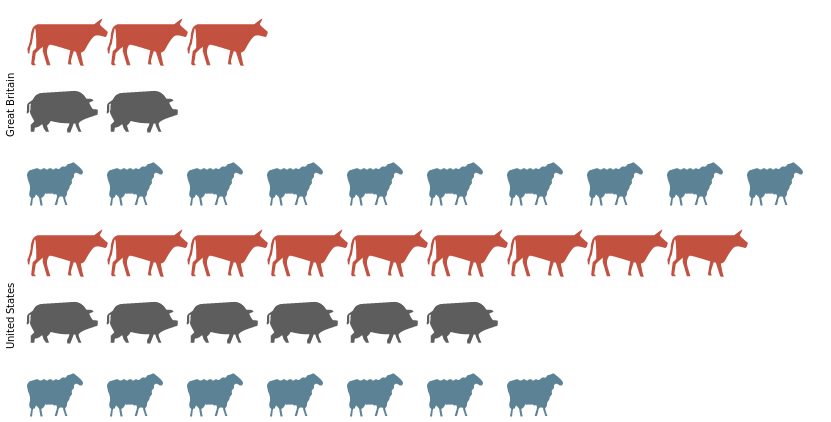

In [53]:
data IsoCountry = GB | US
data IsoAnimal = Cattle | Pigs | Sheep

fromC GB = "Great Britain"
fromC US = "United States"
    
fromA Cattle = "cattle"
fromA Pigs = "pigs"
fromA Sheep = "sheep"        

isotypeBarChart =
    let mkRow country animal col = dataRow [ ("country", Str (fromC country))
                                           , ("animal", Str (fromA animal))
                                           , ("col", Number col)] 
                                       
        dvals = dataFromRows []
                  . mkRow GB Cattle 3
                  . mkRow GB Cattle 2
                  . mkRow GB Cattle 1
                  . mkRow GB Pigs 2
                  . mkRow GB Pigs 1
                  . mkRow GB Sheep 10
                  . mkRow GB Sheep 9
                  . mkRow GB Sheep 8
                  . mkRow GB Sheep 7
                  . mkRow GB Sheep 6
                  . mkRow GB Sheep 5
                  . mkRow GB Sheep 4
                  . mkRow GB Sheep 3
                  . mkRow GB Sheep 2
                  . mkRow GB Sheep 1
                  . mkRow US Cattle 9
                  . mkRow US Cattle 8
                  . mkRow US Cattle 7
                  . mkRow US Cattle 6
                  . mkRow US Cattle 5
                  . mkRow US Cattle 4
                  . mkRow US Cattle 3
                  . mkRow US Cattle 2
                  . mkRow US Cattle 1
                  . mkRow US Pigs 6
                  . mkRow US Pigs 5
                  . mkRow US Pigs 4
                  . mkRow US Pigs 3
                  . mkRow US Pigs 2
                  . mkRow US Pigs 1
                  . mkRow US Sheep 7
                  . mkRow US Sheep 6
                  . mkRow US Sheep 5
                  . mkRow US Sheep 4
                  . mkRow US Sheep 3
                  . mkRow US Sheep 2
                  . mkRow US Sheep 1

        domain = SDomain (DStrings ["person", fromA Cattle, fromA Pigs, fromA Sheep])
        shapeStrs = [
          "M1.7 -1.7h-0.8c0.3 -0.2 0.6 -0.5 0.6 -0.9c0 -0.6 -0.4 -1 -1 -1c-0.6 0 -1 0.4 -1 1c0 0.4 0.2 0.7 0.6 0.9h-0.8c-0.4 0 -0.7 0.3 -0.7 0.6v1.9c0 0.3 0.3 0.6 0.6 0.6h0.2c0 0 0 0.1 0 0.1v1.9c0 0.3 0.2 0.6 0.3 0.6h1.3c0.2 0 0.3 -0.3 0.3 -0.6v-1.8c0 0 0 -0.1 0 -0.1h0.2c0.3 0 0.6 -0.3 0.6 -0.6v-2c0.2 -0.3 -0.1 -0.6 -0.4 -0.6z"
          , "M4 -2c0 0 0.9 -0.7 1.1 -0.8c0.1 -0.1 -0.1 0.5 -0.3 0.7c-0.2 0.2 1.1 1.1 1.1 1.2c0 0.2 -0.2 0.8 -0.4 0.7c-0.1 0 -0.8 -0.3 -1.3 -0.2c-0.5 0.1 -1.3 1.6 -1.5 2c-0.3 0.4 -0.6 0.4 -0.6 0.4c0 0.1 0.3 1.7 0.4 1.8c0.1 0.1 -0.4 0.1 -0.5 0c0 0 -0.6 -1.9 -0.6 -1.9c-0.1 0 -0.3 -0.1 -0.3 -0.1c0 0.1 -0.5 1.4 -0.4 1.6c0.1 0.2 0.1 0.3 0.1 0.3c0 0 -0.4 0 -0.4 0c0 0 -0.2 -0.1 -0.1 -0.3c0 -0.2 0.3 -1.7 0.3 -1.7c0 0 -2.8 -0.9 -2.9 -0.8c-0.2 0.1 -0.4 0.6 -0.4 1c0 0.4 0.5 1.9 0.5 1.9l-0.5 0l-0.6 -2l0 -0.6c0 0 -1 0.8 -1 1c0 0.2 -0.2 1.3 -0.2 1.3c0 0 0.3 0.3 0.2 0.3c0 0 -0.5 0 -0.5 0c0 0 -0.2 -0.2 -0.1 -0.4c0 -0.1 0.2 -1.6 0.2 -1.6c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 0 -2.7 -0.2 -2.7c-0.1 0 -0.4 2 -0.4 2c0 0 0 0.2 -0.2 0.5c-0.1 0.4 -0.2 1.1 -0.2 1.1c0 0 -0.2 -0.1 -0.2 -0.2c0 -0.1 -0.1 -0.7 0 -0.7c0.1 -0.1 0.3 -0.8 0.4 -1.4c0 -0.6 0.2 -1.3 0.4 -1.5c0.1 -0.2 0.6 -0.4 0.6 -0.4z"
          , "M1.2 -2c0 0 0.7 0 1.2 0.5c0.5 0.5 0.4 0.6 0.5 0.6c0.1 0 0.7 0 0.8 0.1c0.1 0 0.2 0.2 0.2 0.2c0 0 -0.6 0.2 -0.6 0.3c0 0.1 0.4 0.9 0.6 0.9c0.1 0 0.6 0 0.6 0.1c0 0.1 0 0.7 -0.1 0.7c-0.1 0 -1.2 0.4 -1.5 0.5c-0.3 0.1 -1.1 0.5 -1.1 0.7c-0.1 0.2 0.4 1.2 0.4 1.2l-0.4 0c0 0 -0.4 -0.8 -0.4 -0.9c0 -0.1 -0.1 -0.3 -0.1 -0.3l-0.2 0l-0.5 1.3l-0.4 0c0 0 -0.1 -0.4 0 -0.6c0.1 -0.1 0.3 -0.6 0.3 -0.7c0 0 -0.8 0 -1.5 -0.1c-0.7 -0.1 -1.2 -0.3 -1.2 -0.2c0 0.1 -0.4 0.6 -0.5 0.6c0 0 0.3 0.9 0.3 0.9l-0.4 0c0 0 -0.4 -0.5 -0.4 -0.6c0 -0.1 -0.2 -0.6 -0.2 -0.5c0 0 -0.4 0.4 -0.6 0.4c-0.2 0.1 -0.4 0.1 -0.4 0.1c0 0 -0.1 0.6 -0.1 0.6l-0.5 0l0 -1c0 0 0.5 -0.4 0.5 -0.5c0 -0.1 -0.7 -1.2 -0.6 -1.4c0.1 -0.1 0.1 -1.1 0.1 -1.1c0 0 -0.2 0.1 -0.2 0.1c0 0 0 0.9 0 1c0 0.1 -0.2 0.3 -0.3 0.3c-0.1 0 0 -0.5 0 -0.9c0 -0.4 0 -0.4 0.2 -0.6c0.2 -0.2 0.6 -0.3 0.8 -0.8c0.3 -0.5 1 -0.6 1 -0.6z"
          , "M-4.1 -0.5c0.2 0 0.2 0.2 0.5 0.2c0.3 0 0.3 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.5 -0.2c0.2 0 0.2 0.2 0.4 0.2c0.2 0 0.2 -0.2 0.4 -0.2c0.1 0 0.2 0.2 0.4 0.1c0.2 0 0.2 -0.2 0.4 -0.3c0.1 0 0.1 -0.1 0.4 0c0.3 0 0.3 -0.4 0.6 -0.4c0.3 0 0.6 -0.3 0.7 -0.2c0.1 0.1 1.4 1 1.3 1.4c-0.1 0.4 -0.3 0.3 -0.4 0.3c-0.1 0 -0.5 -0.4 -0.7 -0.2c-0.3 0.2 -0.1 0.4 -0.2 0.6c-0.1 0.1 -0.2 0.2 -0.3 0.4c0 0.2 0.1 0.3 0 0.5c-0.1 0.2 -0.3 0.2 -0.3 0.5c0 0.3 -0.2 0.3 -0.3 0.6c-0.1 0.2 0 0.3 -0.1 0.5c-0.1 0.2 -0.1 0.2 -0.2 0.3c-0.1 0.1 0.3 1.1 0.3 1.1l-0.3 0c0 0 -0.3 -0.9 -0.3 -1c0 -0.1 -0.1 -0.2 -0.3 -0.2c-0.2 0 -0.3 0.1 -0.4 0.4c0 0.3 -0.2 0.8 -0.2 0.8l-0.3 0l0.3 -1c0 0 0.1 -0.6 -0.2 -0.5c-0.3 0.1 -0.2 -0.1 -0.4 -0.1c-0.2 -0.1 -0.3 0.1 -0.4 0c-0.2 -0.1 -0.3 0.1 -0.5 0c-0.2 -0.1 -0.1 0 -0.3 0.3c-0.2 0.3 -0.4 0.3 -0.4 0.3l0.2 1.1l-0.3 0l-0.2 -1.1c0 0 -0.4 -0.6 -0.5 -0.4c-0.1 0.3 -0.1 0.4 -0.3 0.4c-0.1 -0.1 -0.2 1.1 -0.2 1.1l-0.3 0l0.2 -1.1c0 0 -0.3 -0.1 -0.3 -0.5c0 -0.3 0.1 -0.5 0.1 -0.7c0.1 -0.2 -0.1 -1 -0.2 -1.1c-0.1 -0.2 -0.2 -0.8 -0.2 -0.8c0 0 -0.1 -0.5 0.4 -0.8z"
          ]
        
        enc = encoding
                . position X [ PName "col", PmType Ordinal, PAxis [] ]
                . position Y [ PName "animal", PmType Ordinal, PAxis [] ]
                . row [ FName "country", FmType Nominal, FHeader [HTitle ""] ]
                . shape [ MName "animal", MmType Nominal
                        , MScale [ domain
                                 , SRange (RStrings shapeStrs)
                                 ]
                        , MLegend []
                        ]
                . color [ MName "animal", MmType Nominal
                        , MLegend []
                        , MScale [ domain
                                 , SRange (RStrings [ "rgb(162,160,152)"
                                                    , "rgb(194,81,64)"
                                                    , "rgb(93,93,93)"
                                                    , "rgb(91,131,149)"
                                                    ]
                                          )
                                 ]
                         ]
                . opacity [ MNumber 1 ]
                . size [ MNumber 200 ]
                
        conf = configure
                . configuration (View [ViewStroke Nothing])
                
    in toVegaLite [width 800, height 200, conf [], dvals [], mark Point [MFilled True], enc []]
    
vlShow isotypeBarChart

The Vega-Lite specification allows the same effect to be encoded in multiple ways in several places; for
instance `""` and `null` can have the same meaning (as shown below for the `stroke` option of the
`view` setting).

In [54]:
validate isotypeBarChartSpec isotypeBarChart

The visualization and expected specification do not match.

Values are different for "config"
  Expected: Object (fromList [("view",Object (fromList [("stroke",String "")]))])
  Found   : Object (fromList [("view",Object (fromList [("stroke",Null)]))])

The field-level differences are:
5c5
<       "stroke": ""
---
>       "stroke": null

Return to the [Table of Contents](#Table-of-Contents).

### Isotype Bar Chart With Emoji

From https://vega.github.io/vega-lite/examples/isotype_bar_chart_emoji.html

Because emoji, I guess.

In [55]:
isotypeBarChartEmojiSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "config": {"view": {"stroke": ""}},
  "width": 800,
  "height": 200,
  "data": {
    "values": [
      {"country": "Great Britain", "animal": "pigs"},
      {"country": "Great Britain", "animal": "pigs"},
      {"country": "Great Britain", "animal": "cattle"},
      {"country": "Great Britain", "animal": "cattle"},
      {"country": "Great Britain", "animal": "cattle"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "Great Britain", "animal": "sheep"},
      {"country": "United States", "animal": "pigs"},
      {"country": "United States", "animal": "pigs"},
      {"country": "United States", "animal": "pigs"},
      {"country": "United States", "animal": "pigs"},
      {"country": "United States", "animal": "pigs"},
      {"country": "United States", "animal": "pigs"},
      {"country": "United States", "animal": "cattle"},
      {"country": "United States", "animal": "cattle"},
      {"country": "United States", "animal": "cattle"},
      {"country": "United States", "animal": "cattle"},
      {"country": "United States", "animal": "cattle"},
      {"country": "United States", "animal": "cattle"},
      {"country": "United States", "animal": "cattle"},
      {"country": "United States", "animal": "cattle"},
      {"country": "United States", "animal": "cattle"},
      {"country": "United States", "animal": "sheep"},
      {"country": "United States", "animal": "sheep"},
      {"country": "United States", "animal": "sheep"},
      {"country": "United States", "animal": "sheep"},
      {"country": "United States", "animal": "sheep"},
      {"country": "United States", "animal": "sheep"},
      {"country": "United States", "animal": "sheep"}
    ]
  },
  "transform": [
    {
      "calculate": "{'cattle': '🐄', 'pigs': '🐖', 'sheep': '🐏'}[datum.animal]",
      "as": "emoji"
    },
    {"window": [{"op": "rank", "as": "rank"}], "groupby": ["country", "animal"]}
  ],
  "mark": {"type": "text", "baseline": "middle"},
  "encoding": {
    "x": {"field": "rank", "type": "ordinal", "axis": null},
    "y": {"field": "animal", "type": "nominal", "axis": null, "sort": null},
    "row": {"field": "country", "type": "nominal", "header": {"title": ""}},
    "text": {"field": "emoji", "type": "nominal"},
    "size": {"value": 65}
  }
}
|]

I am going to re-use the `IsoCountry` and `IsoAnimal` types, and related functions (`fromC`, `fromA`)
from the previous  example (namely [Isotype Bar Chart](#Isotope-Bar-Chart)).

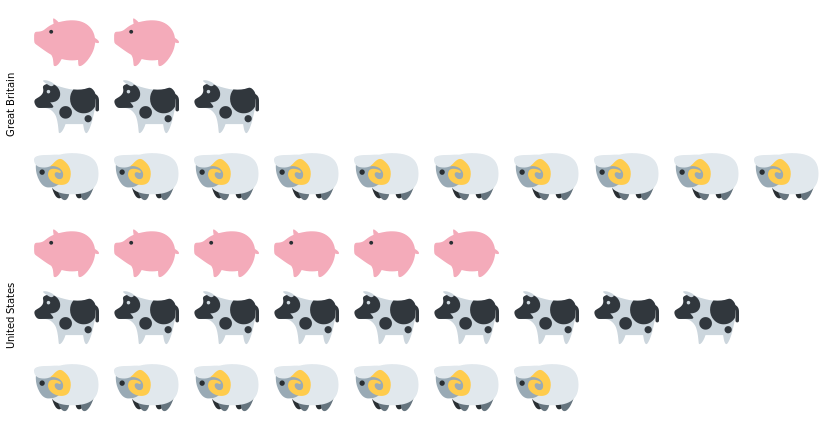

In [56]:
isotypeBarChartEmoji =
    let dvals = dataFromColumns []
                  . dataColumn "country" (Strings countries)
                  . dataColumn "animal" (Strings animals)
                  
        countries = map fromC (replicate nGB GB <> replicate nUS US)
         
        toAnimal (n, a) = replicate n (fromA a)
        animalsGB = concatMap toAnimal [(2, Pigs), (3, Cattle), (10, Sheep)]
        animalsUS = concatMap toAnimal [(6, Pigs), (9, Cattle), (7, Sheep)]
        animals = animalsGB <> animalsUS
        nGB = length animalsGB
        nUS = length animalsUS

        trans = transform
                  . calculateAs "{'cattle': '🐄', 'pigs': '🐖', 'sheep': '🐏'}[datum.animal]" "emoji"
                  . window [([WOp Rank], "rank")] [WGroupBy ["country", "animal"]]

        enc = encoding
                . position X [ PName "rank", PmType Ordinal, PAxis [] ]
                . position Y [ PName "animal", PmType Nominal, PAxis [], PSort [] ]
                . row [ FName "country", FmType Nominal, FHeader [HTitle ""] ]
                . text [ TName "emoji", TmType Nominal ]
                . size [ MNumber 65 ]
                
        conf = configure
                . configuration (View [ViewStroke Nothing])
                
        textMark = mark Text [MBaseline AlignMiddle]
                
    in toVegaLite [width 800, height 200, conf [], dvals [], trans [], textMark, enc []]
    
vlShow isotypeBarChartEmoji

The Vega-Lite specification allows the same effect to be encoded in multiple ways in several places; for
instance `""` and `null` can have the same meaning (as shown below for the `stroke` option of the
`view` setting).

In [57]:
validate isotypeBarChartEmojiSpec isotypeBarChartEmoji

The visualization and expected specification do not match.

Values are different for "config"
  Expected: Object (fromList [("view",Object (fromList [("stroke",String "")]))])
  Found   : Object (fromList [("view",Object (fromList [("stroke",Null)]))])

The field-level differences are:
23c23
<       "stroke": ""
---
>       "stroke": null

Return to the [Table of Contents](#Table-of-Contents).

---

## Scatter and Strip Plots
 
 - [Scatterplot](#Scatterplot)
 - [Dot Plot](#Dot-Plot)
 - [Strip Plot](#Strip-Plot)
 - [Colored Scatterplot](#Colored-Scatterplot)
 - [Binned Scatterplot](#Binned-Scatterplot)
 - [Bubble Plot](#Bubble-Plot)
 - [Scatterplot with Null Values in Grey](#Scatterplot-with-Null-Values-in-Grey)
 - [Scatterplot with filled circles](#Scatterplot-with-filled-circles)
 - [Bubble Plot (Gapminder)](#Bubble-Plot-%28Gapminder%29)
 - [Bubble Plot (Natural Disasters)](#Natural-Disasters)
 - [Scatter Plot with Text Marks](#Scatter-Plot-with-Text-Marks)

---

### Scatterplot

From https://vega.github.io/vega-lite/examples/point_2d.html

In [58]:
point2dSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A scatterplot showing horsepower and miles per gallons for various cars.",
  "data": {"url": "data/cars.json"},
  "mark": "point",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"}
  }
}
|]

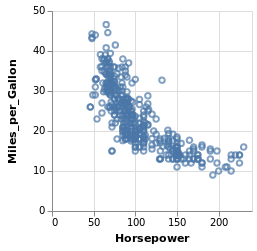

In [59]:
point2d =
    let dvals = dataFromUrl "data/cars.json"
        desc = "A scatterplot showing horsepower and miles per gallons for various cars."
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]

    in toVegaLite [description desc, dvals [], mark Point [], enc []]
       
vlShow point2d

In [60]:
validate point2dSpec point2d

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Dot Plot

From https://vega.github.io/vega-lite/examples/tick_dot.html

In [61]:
dotPlotSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/seattle-weather.csv"},
  "mark": "tick",
  "encoding": {
    "x": {"field": "precipitation", "type": "quantitative"}
  }
}
|]

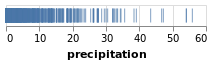

In [62]:
-- For this example, as it is simple, I am going to use "explicit"
-- function application to create the encoding entry, rather than
-- function composition (which is used in the vast-majority of the
-- other examples).
--

dotPlot =
    let dvals = dataFromUrl "data/seattle-weather.csv" []
    
        enc = encoding (position X [PName "precipitation", PmType Quantitative] [])
        
    in toVegaLite [dvals, mark Tick [], enc]
    
vlShow dotPlot

In [63]:
validate dotPlotSpec dotPlot

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Strip Plot

From https://vega.github.io/vega-lite/examples/tick_strip.html

In [64]:
tickStripSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Shows the relationship between horsepower and the numbver of cylinders using tick marks.",
  "data": {"url": "data/cars.json"},
  "mark": "tick",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Cylinders", "type": "ordinal"}
  }
}
|]

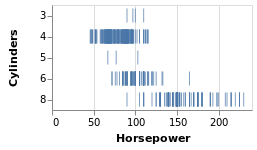

In [65]:
tickStrip =
    let dvals = dataFromUrl "data/cars.json"
        desc = "Shows the relationship between horsepower and the numbver of cylinders using tick marks."
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Cylinders", PmType Ordinal]

    in toVegaLite [description desc, dvals [], mark Tick [], enc []]
       
vlShow tickStrip

In [66]:
validate tickStripSpec tickStrip

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Colored Scatterplot

From https://vega.github.io/vega-lite/examples/point_color_with_shape.html

In [67]:
pointColorWithShapeSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A scatterplot showing horsepower and miles per gallons.",
  "data": {"url": "data/cars.json"},
  "mark": "point",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "color": {"field": "Origin", "type": "nominal"},
    "shape": {"field": "Origin", "type": "nominal"}
  }
}
|]

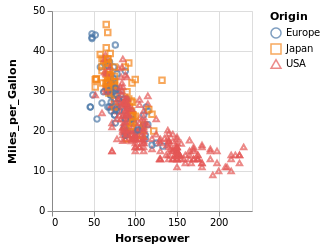

In [68]:
pointColorWithShape =
    let dvals = dataFromUrl "data/cars.json"
        desc = "A scatterplot showing horsepower and miles per gallons."
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                 . color [MName "Origin", MmType Nominal]
                 . shape [MName "Origin", MmType Nominal]
                 
    in toVegaLite [description desc, dvals [], mark Point [], enc []]
       
vlShow pointColorWithShape

In [69]:
validate pointColorWithShapeSpec pointColorWithShape

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Binned Scatterplot

From https://vega.github.io/vega-lite/examples/circle_binned.html

In [70]:
circleBinnedSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/movies.json"},
  "mark": "circle",
  "encoding": {
    "x": {
      "bin": {"maxbins": 10},
      "field": "IMDB_Rating",
      "type": "quantitative"
    },
    "y": {
      "bin": {"maxbins": 10},
      "field": "Rotten_Tomatoes_Rating",
      "type": "quantitative"
    },
    "size": {
      "aggregate": "count",
      "type": "quantitative"
    }
  }
}
|]

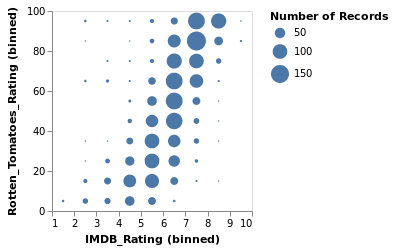

In [71]:
circleBinned =
    let dvals = dataFromUrl "data/movies.json"
           
        enc = encoding
                 . position X [PName "IMDB_Rating", PmType Quantitative, PBin [MaxBins 10]]
                 . position Y [PName "Rotten_Tomatoes_Rating", PmType Quantitative, PBin [MaxBins 10]]
                 . size [MAggregate Count, MmType Quantitative]
                 
    in toVegaLite [dvals [], mark Circle [], enc []]
       
vlShow circleBinned

In [72]:
validate circleBinnedSpec circleBinned

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Bubble Plot

From https://vega.github.io/vega-lite/examples/point_bubble.html

In [73]:
pointBubbleSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A bubbleplot showing horsepower on x, miles per gallons on y, and binned acceleration on size.",
  "data": {"url": "data/cars.json"},
  "mark": "point",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "size": {"field": "Acceleration", "type": "quantitative"}
  }
}
|]

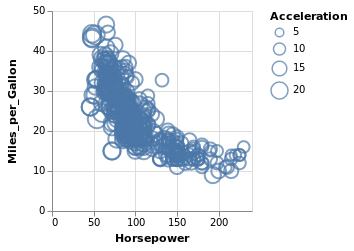

In [74]:
pointBubble =
    let dvals = dataFromUrl "data/cars.json"
        desc = "A bubbleplot showing horsepower on x, miles per gallons on y, and binned acceleration on size."
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                 . size [MName "Acceleration", MmType Quantitative]

    in toVegaLite [description desc, dvals [], mark Point [], enc []]
       
vlShow pointBubble

In [75]:
validate pointBubbleSpec pointBubble

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Scatterplot with Null Values in Grey

From https://vega.github.io/vega-lite/examples/point_invalid_color.html

In [76]:
pointInvalidColorSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {
    "url": "data/movies.json"
  },
  "mark": "point",
  "encoding": {
    "x": {
      "field": "IMDB_Rating",
      "type": "quantitative"
    },
    "y": {
      "field": "Rotten_Tomatoes_Rating",
      "type": "quantitative"
    },
    "color": {
      "condition": {
        "test": "datum.IMDB_Rating === null || datum.Rotten_Tomatoes_Rating === null",
        "value": "#aaa"
      }
    }
  },
  "config": {
    "invalidValues": null
  }
}
|]

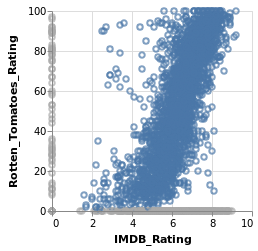

In [77]:
pointInvalidColor =
    let dvals = dataFromUrl "data/movies.json"
        
        -- prior to version 0.4.0.0 of hvega, the MDataCondition constructor took
        -- a single expression, rather than a list.
        --
        enc = encoding
                 . position X [PName "IMDB_Rating", PmType Quantitative]
                 . position Y [PName "Rotten_Tomatoes_Rating", PmType Quantitative]
                 . color [MDataCondition
                          [(Expr "datum.IMDB_Rating === null || datum.Rotten_Tomatoes_Rating === null",
                           [MString "#aaa"])]
                          []
                          ]
                 
        config = configure
                    . configuration (RemoveInvalid False)
           
    in toVegaLite [dvals [], mark Point [], enc [], config []]

vlShow pointInvalidColor

In [78]:
validate pointInvalidColorSpec pointInvalidColor

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Scatterplot with filled circles

From https://vega.github.io/vega-lite/examples/circle.html

In [79]:
circleSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/cars.json"},
  "mark": "circle",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"}
  }
}
|]

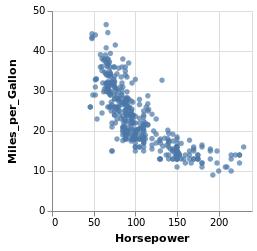

In [80]:
circle =
    let dvals = dataFromUrl "data/cars.json"
        desc = "A scatterplot showing horsepower and miles per gallons for various cars."
           
        enc = encoding
                 . position X [PName "Horsepower", PmType Quantitative]
                 . position Y [PName "Miles_per_Gallon", PmType Quantitative]

    in toVegaLite [dvals [], mark Circle [], enc []]

vlShow circle

In [81]:
validate circleSpec circle

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Bubble Plot (Gapminder)

From https://vega.github.io/vega-lite/examples/circle_bubble_health_income.html

In [82]:
circleBubbleHealthIncomeSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A bubble plot showing the correlation between health and income for 187 countries in the world (modified from an example in Lisa Charlotte Rost's blog post 'One Chart, Twelve Charting Libraries' --http://lisacharlotterost.github.io/2016/05/17/one-chart-code/).",
  "width": 500,"height": 300,
  "data": {
    "url": "data/gapminder-health-income.csv"
  },
  "selection": {
    "view": {"type": "interval", "bind": "scales"}
  },
  "mark": "circle",
  "encoding": {
    "y": {
      "field": "health",
      "type": "quantitative",
      "scale": {"zero": false},
      "axis": {"minExtent": 30}
    },
    "x": {
      "field": "income",
      "type": "quantitative",
      "scale": {"type": "log"}
    },
    "size": {"field": "population","type": "quantitative"},
    "color": {"value": "#000"}
  }
}
|]

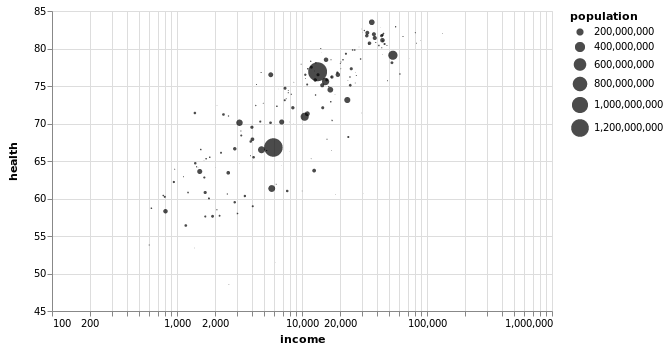

In [83]:
circleBubbleHealthIncome =
    let dvals = dataFromUrl "data/gapminder-health-income.csv"
        desc = "A bubble plot showing the correlation between health and income for 187 countries in the world (modified from an example in Lisa Charlotte Rost's blog post 'One Chart, Twelve Charting Libraries' --http://lisacharlotterost.github.io/2016/05/17/one-chart-code/)."
           
        sel = selection
                 . select "view" Interval [BindScales]
                 
        enc = encoding
                 . position Y [ PName "health", PmType Quantitative
                              , PScale [SZero False], PAxis [ AxMinExtent 30 ] ]
                 . position X [ PName "income", PmType Quantitative
                              , PScale [SType ScLog] ]
                 . size [MName "population", MmType Quantitative]
                 . color [MString "#000"]

    in toVegaLite [ description desc, width 500, height 300
                  , dvals [], sel [], mark Circle [], enc [] ]
        
vlShow circleBubbleHealthIncome

In [84]:
validate circleBubbleHealthIncomeSpec circleBubbleHealthIncome

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Bubble Plot (Natural Disasters)

From https://vega.github.io/vega-lite/examples/circle_natural_disasters.html

In [85]:
circleNaturalDisastersSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {
    "url": "data/disasters.csv"
  },
  "width": 600,
  "height": 400,
  "transform": [
    {"filter": "datum.Entity !== 'All natural disasters'"}
  ],
  "mark": {
    "type": "circle",
    "opacity": 0.8,
    "stroke": "black",
    "strokeWidth": 1
  },
  "encoding": {
    "x": {
      "field": "Year",
      "type": "ordinal",
      "axis": {"labelAngle": 0}
    },
    "y": {"field": "Entity", "type": "nominal", "axis": {"title": ""}},
    "size": {
      "field": "Deaths",
      "type": "quantitative",
      "legend": {"title": "Annual Global Deaths", "clipHeight": 30},
      "scale": {"range": [0, 5000]}
    },
    "color": {"field": "Entity", "type": "nominal", "legend": null}
  }
}
|]

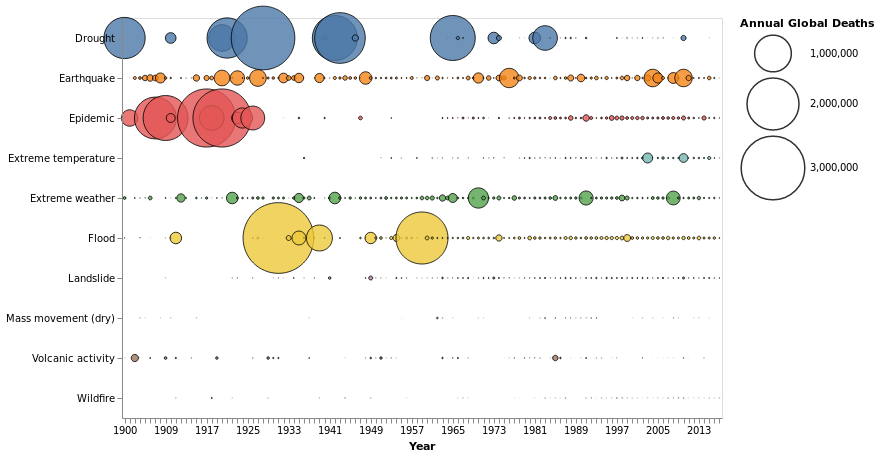

In [86]:
circleNaturalDisasters =
    let dvals = dataFromUrl "data/disasters.csv"
           
        trans = transform
                   . filter (FExpr "datum.Entity !== 'All natural disasters'")
                   
        markOpts = [MOpacity 0.8, MStroke "black", MStrokeWidth 1]
           
        enc = encoding
                 . position X [PName "Year", PmType Ordinal, PAxis [AxLabelAngle 0]]
                 . position Y [PName "Entity", PmType Nominal, PAxis [AxTitle ""]]
                 . size [ MName "Deaths", MmType Quantitative
                        , MLegend [LTitle "Annual Global Deaths", LClipHeight 30]
                        , MScale [SRange (RNumbers [0, 5000])]
                        ]
                 . color [MName "Entity", MmType Nominal, MLegend []]
                 
    in toVegaLite [ dvals [], width 600, height 400, trans []
                  , mark Circle markOpts
                  , enc [] ]
       
vlShow circleNaturalDisasters

In [87]:
validate circleNaturalDisastersSpec circleNaturalDisasters

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Scatter Plot with Text Marks

From https://vega.github.io/vega-lite/examples/text_scatterplot_colored.html

In [88]:
scatterPlotTextMarksSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/cars.json"},
  "transform": [{
    "calculate": "datum.Origin[0]",
    "as": "OriginInitial"
  }],
  "mark": "text",
  "encoding": {
    "x": {"field": "Horsepower", "type": "quantitative"},
    "y": {"field": "Miles_per_Gallon", "type": "quantitative"},
    "color": {"field": "Origin", "type": "nominal"},
    "text": {"field": "OriginInitial", "type": "nominal"}
  }
}
|]

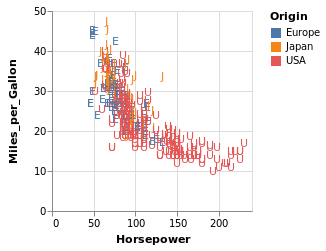

In [89]:
scatterPlotTextMarks =
    let dvals = dataFromUrl "data/cars.json" []
    
        trans = transform
                  . calculateAs "datum.Origin[0]" "OriginInitial"
    
        enc = encoding
                . position X [PName "Horsepower", PmType Quantitative]
                . position Y [PName "Miles_per_Gallon", PmType Quantitative]
                . color [MName "Origin", MmType Nominal]
                . text [TName "OriginInitial", TmType Nominal]
                
    in toVegaLite [dvals, trans [], mark Text [], enc []]
    
vlShow scatterPlotTextMarks

In [90]:
validate scatterPlotTextMarksSpec scatterPlotTextMarks

Okay

Return to the [Table of Contents](#Table-of-Contents).

---

## Line Charts
 
 - [Line Chart](#Line-Chart)
 - [Line Chart with Point Markers](#Line-Chart-with-Point-Markers)
 - [Line Chart with Stroked Point Markers](#Line-Chart-with-Stroked-Point-Markers)
 - [Multi Series Line Chart](#Multi-Series-Line-Chart)
 - [Slope Graph](#Slope-Graph)
 - [Step Chart](#Step-Chart)
 - [Line Chart with Monotone Interpolation](#Line-Chart-with-Monotone-Interpolation)
 - [Connected Scatterplot (Lines with Custom Paths)](#Connected-Scatterplot-%28Lines-with-Custom-Paths%29)
 - [Line Chart with Varying Size (using the trail mark)](#Line-Chart-with-Varying-Size-%28using-the-trail-mark%29)
 - [Line Chart with Markers and Invalid Values](#Line-Chart-with-Markers-and-Invalid-Values)
 - [Carbon Dioxide in the Atmosphere](#Carbon-Dioxide-in-the-Atmosphere)
 - [Line Charts Showing Ranks Over Time](#Line-Chart-Showing-Ranks-Over-Time)
 - [Drawing Sine and Cosine Curves with the Sequence Generator](#Drawing-Sine-and-Cosine-Curves-with-the-Sequence-Generator)

---

### Line Chart

From https://vega.github.io/vega-lite/examples/line.html

In [91]:
lineSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Google's stock price over time.",
  "data": {"url": "data/stocks.csv"},
  "transform": [{"filter": "datum.symbol==='GOOG'"}],
  "mark": "line",
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "y": {"field": "price", "type": "quantitative"}
  }
}
|]

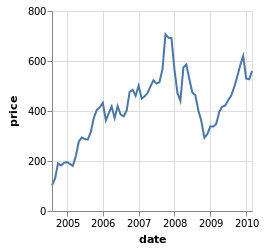

In [92]:
line =
    let dvals = dataFromUrl "data/stocks.csv"
        desc = "Google's stock price over time."
           
        trans = transform
                   . filter (FExpr "datum.symbol==='GOOG'")
                   
        enc = encoding
                 . position X [PName "date", PmType Temporal]
                 . position Y [PName "price", PmType Quantitative]

    in toVegaLite [description desc, dvals [], trans [], mark Line [], enc []]
       
vlShow line

In [93]:
validate lineSpec line

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Line Chart with Point Markers

From https://vega.github.io/vega-lite/examples/line_overlay.html

In [94]:
lineChartPointMarkersSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Stock prices of 5 Tech Companies over Time.",
  "data": {"url": "data/stocks.csv"},
  "mark": {
    "type": "line",
    "point": true
  },
  "encoding": {
    "x": {"timeUnit": "year", "field": "date", "type": "temporal"},
    "y": {"aggregate":"mean", "field": "price", "type": "quantitative"},
    "color": {"field": "symbol", "type": "nominal"}
  }
}
|]

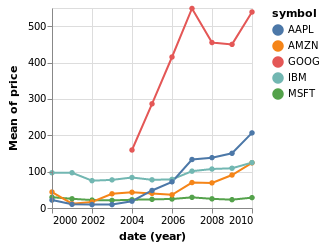

In [95]:
lineChartPointMarkers =
    let label = description "Stock prices of 5 Tech Companies over Time."
        dvals = dataFromUrl "data/stocks.csv" []
    
        markOpts = mark Line [MPoint (PMMarker [])]
        
        enc = encoding
                . position X [PName "date", PmType Temporal, PTimeUnit Year]
                . position Y [PName "price", PmType Quantitative, PAggregate Mean]
                . color [MName "symbol", MmType Nominal]
                
    in toVegaLite [label, dvals, markOpts, enc []]
    
vlShow lineChartPointMarkers

In [96]:
validate lineChartPointMarkersSpec lineChartPointMarkers

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Line Chart with Stroked Point Markers

From https://vega.github.io/vega-lite/examples/line_overlay_stroked.html

In [97]:
lineChartStrokedPointMarkersSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Stock prices of 5 Tech Companies over Time.",
  "data": {"url": "data/stocks.csv"},
  "mark": {
    "type": "line",
    "point": {
      "filled": false,
      "fill": "white"
    }
  },
  "encoding": {
    "x": {"timeUnit": "year", "field": "date", "type": "temporal"},
    "y": {"aggregate":"mean", "field": "price", "type": "quantitative"},
    "color": {"field": "symbol", "type": "nominal"}
  }
}
|]

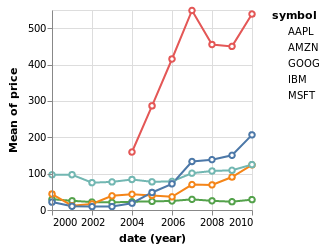

In [98]:
lineChartStrokedPointMarkers =
    let label = description "Stock prices of 5 Tech Companies over Time."
        dvals = dataFromUrl "data/stocks.csv" []
    
        markOpts = mark Line [MPoint (PMMarker [MFilled False, MFill "white"])]
        
        enc = encoding
                . position X [PName "date", PmType Temporal, PTimeUnit Year]
                . position Y [PName "price", PmType Quantitative, PAggregate Mean]
                . color [MName "symbol", MmType Nominal]
                
    in toVegaLite [label, dvals, markOpts, enc []]
    
vlShow lineChartStrokedPointMarkers

In [99]:
validate lineChartStrokedPointMarkersSpec lineChartStrokedPointMarkers

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Multi Series Line Chart

From https://vega.github.io/vega-lite/examples/line_color.html

In [100]:
lineColorSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Stock prices of 5 Tech Companies over Time.",
  "data": {"url": "data/stocks.csv"},
  "mark": "line",
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "y": {"field": "price", "type": "quantitative"},
    "color": {"field": "symbol", "type": "nominal"}
  }
}
|]

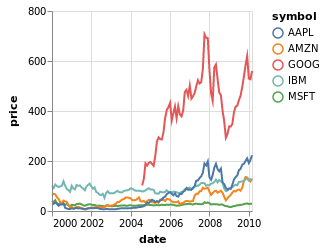

In [101]:
lineColor =
    let dvals = dataFromUrl "data/stocks.csv" []
        desc = "Stock prices of 5 Tech Companies over Time."
           
        enc = encoding
                 . position X [PName "date", PmType Temporal]
                 . position Y [PName "price", PmType Quantitative]
                 . color [MName "symbol", MmType Nominal]

    in toVegaLite [description desc, dvals, mark Line [], enc []]
       
vlShow lineColor

In [102]:
validate lineColorSpec lineColor

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Slope Graph

From https://vega.github.io/vega-lite/examples/line_slope.html

In [103]:
lineSlopeSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/barley.json"},
  "description": "Slope graph showing the change in yield for different barley sites. It shows the error in the year labels for the Morris site.",
  "mark": "line",
  "encoding": {
    "x": {
      "field": "year",
      "type": "ordinal",
      "scale": {"rangeStep": 50, "padding": 0.5}
    },
    "y": {
      "aggregate": "median",
      "field": "yield",
      "type": "quantitative"
    },
    "color": {"field": "site", "type": "nominal"}
  }
}
|]

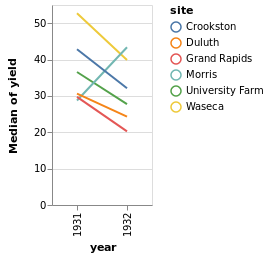

In [104]:
lineSlope =
    let dvals = dataFromUrl "data/barley.json" []
        desc = "Slope graph showing the change in yield for different barley sites. It shows the error in the year labels for the Morris site."
           
        enc = encoding
                 . position X [ PName "year", PmType Ordinal
                              , PScale [SRangeStep (Just 50), SPadding 0.5]
                              ]
                 . position Y [ PName "yield", PmType Quantitative
                              , PAggregate Median
                              ]
                 . color [MName "site", MmType Nominal]

    in toVegaLite [description desc, dvals, mark Line [], enc []]
       
vlShow lineSlope

In [105]:
validate lineSlopeSpec lineSlope

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Step Chart

From https://vega.github.io/vega-lite/examples/line_step.html

In [106]:
lineStepSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Google's stock price over time.",
  "data": {"url": "data/stocks.csv"},
  "transform": [{"filter": "datum.symbol==='GOOG'"}],
  "mark": {
    "type": "line",
    "interpolate": "step-after"
  },
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "y": {"field": "price", "type": "quantitative"}
  }
}
|]

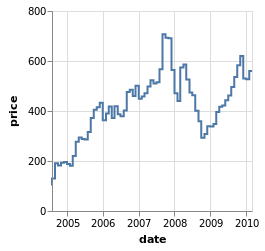

In [107]:
lineStep =
    let dvals = dataFromUrl "data/stocks.csv"
        desc = "Google's stock price over time."
           
        trans = transform
                   . filter (FExpr "datum.symbol==='GOOG'")
                   
        enc = encoding
                 . position X [PName "date", PmType Temporal]
                 . position Y [PName "price", PmType Quantitative]

    in toVegaLite [ description desc, dvals [], trans []
                  , mark Line [MInterpolate StepAfter]
                  , enc []]
       
vlShow lineStep

In [108]:
validate lineStepSpec lineStep

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Line Chart with Monotone Interpolation

From https://vega.github.io/vega-lite/examples/line_monotone.html

In [109]:
lineMonotoneSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/stocks.csv"},
  "transform": [{"filter": "datum.symbol==='GOOG'"}],
  "mark": {
    "type": "line",
    "interpolate": "monotone"
  },
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "y": {"field": "price", "type": "quantitative"}
  }
}
|]

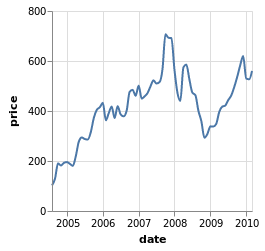

In [110]:
lineMonotone =
    let dvals = dataFromUrl "data/stocks.csv" [] 
    
        trans = transform
                  . filter (FExpr "datum.symbol==='GOOG'")
                  
        markOpts = mark Line [MInterpolate Monotone]
        
        enc = encoding
                . position X [PName "date", PmType Temporal]
                . position Y [PName "price", PmType Quantitative]
                
    in toVegaLite [dvals, trans [], markOpts, enc []]
    
vlShow lineMonotone

In [111]:
validate lineMonotoneSpec lineMonotone

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Connected Scatterplot (Lines with Custom Paths)

From https://vega.github.io/vega-lite/examples/layer_connected_scatterplot.html

In [112]:
layerConnectedScatterPlotSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/driving.json"},
  "mark": {"type": "line", "point": true},
  "encoding": {
    "x": {
      "field": "miles", "type": "quantitative",
      "scale": {"zero": false}
    },
    "y": {
      "field": "gas", "type": "quantitative",
      "scale": {"zero": false}
    },
    "order": {"field": "year","type": "temporal"}
  }
}
|]

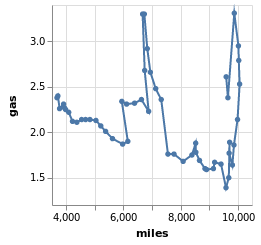

In [113]:
layerConnectedScatterPlot =
    let dvals = dataFromUrl "data/driving.json" []
           
        markOpts = mark Line [MPoint (PMMarker [])]
        
        enc = encoding
                 . position X [PName "miles", PmType Quantitative, PScale [SZero False]]
                 . position Y [PName "gas", PmType Quantitative, PScale [SZero False]]
                 . order [OName "year", OmType Temporal]

    in toVegaLite [dvals, markOpts, enc []]
       
vlShow layerConnectedScatterPlot

In [114]:
validate layerConnectedScatterPlotSpec layerConnectedScatterPlot

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Line Chart with Varying Size (using the trail mark)

From https://vega.github.io/vega-lite/examples/trail_color.html

In [115]:
trailColorSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Stock prices of 5 Tech Companies over Time.",
  "data": {"url": "data/stocks.csv"},
  "mark": "trail",
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "y": {"field": "price", "type": "quantitative"},
    "size": {"field": "price", "type": "quantitative"},
    "color": {"field": "symbol", "type": "nominal"}
  }
}
|]

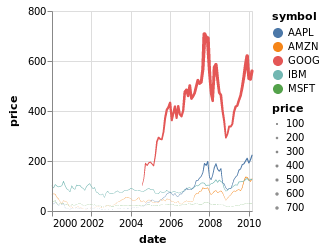

In [116]:
trailColor =
    let label = description "Stock prices of 5 Tech Companies over Time."
        dvals = dataFromUrl "data/stocks.csv" []
        markOpts = mark Trail []
        
        enc = encoding
                . position X [PName "date", PmType Temporal]
                . position Y [PName "price", PmType Quantitative]
                . size [MName "price", MmType Quantitative]
                . color [MName "symbol", MmType Nominal]

    in toVegaLite [label, dvals, markOpts, enc []]

vlShow trailColor

In [117]:
validate trailColorSpec trailColor

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Line Chart with Markers and Invalid Values

From https://vega.github.io/vega-lite/examples/line_skip_invalid_mid_overlay.html

In [118]:
lineSkipInvalidMidOverlaySpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {
    "values": [
      {
        "x": 1,
        "y": 10
      },
      {
        "x": 2,
        "y": 30
      },
      {
        "x": 3,
        "y": null
      },
      {
        "x": 4,
        "y": 15
      },
      {
        "x": 5,
        "y": null
      },
      {
        "x": 6,
        "y": 40
      },
      {
        "x": 7,
        "y": 20
      }
    ]
  },
  "mark": {"type": "line", "point": true},
  "encoding": {
    "x": {"field": "x", "type": "quantitative"},
    "y": {"field": "y", "type": "quantitative"}
  }
}
|]

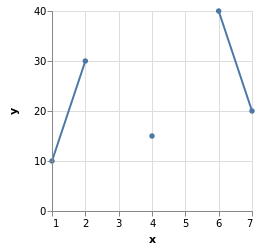

In [119]:
import qualified Data.Aeson as A
import Data.Aeson ((.=))

lineSkipInvalidMidOverlay =
    let rows = map A.object [ ["x" .= 1, "y" .= 10]
                            , ["x" .= 2, "y" .= 30]
                            , ["x" .= 3, "y" .= missing]
                            , ["x" .= 4, "y" .= 15]
                            , ["x" .= 5, "y" .= missing]
                            , ["x" .= 6, "y" .= 40]
                            , ["x" .= 7, "y" .= 20] ]
        missing :: Maybe Int
        missing = Nothing
        
        dvals = A.toJSON rows
        
        markOpts = mark Line [MPoint (PMMarker [])]
        
        enc = encoding
                . position X [PName "x", PmType Quantitative]
                . position Y [PName "y", PmType Quantitative]

    in toVegaLite [dataFromJson dvals [], markOpts, enc []]

vlShow lineSkipInvalidMidOverlay

In [120]:
validate lineSkipInvalidMidOverlaySpec lineSkipInvalidMidOverlay

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Carbon Dioxide in the Atmosphere

From https://vega.github.io/vega-lite/examples/layer_line_co2_concentration.html

In [121]:
layerLineCO2Spec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {
    "url": "data/co2-concentration.csv",
    "format": {"parse": {"Date": "utc:'%Y-%m-%d'"}}
  },
  "width": 800,
  "height": 500,
  "transform": [
    {"calculate": "year(datum.Date)", "as": "year"},
    {"calculate": "floor(datum.year / 10)", "as": "decade"},
    {
      "calculate": "(datum.year % 10) + (month(datum.Date)/12)",
      "as": "scaled_date"
    },
    {
      "window": [
        {"op": "first_value", "field": "scaled_date", "as": "first_date"},
        {"op": "last_value", "field": "scaled_date", "as": "last_date"}
      ],
      "sort": [
        {"field": "scaled_date", "order": "ascending"}
      ],
      "groupby": ["decade"],
      "frame": [null, null]
    },
    {
      "calculate": "datum.first_date === datum.scaled_date ? 'first' : datum.last_date === datum.scaled_date ? 'last' : null",
      "as": "end"
    }
  ],
  "encoding": {
    "x": {
      "field": "scaled_date",
      "type": "quantitative",
      "axis": {"title": "Year into Decade", "tickCount": 11}
    },
    "y": {
      "field": "CO2",
      "title": "CO2 concentration in ppm",
      "type": "quantitative",
      "scale": {"zero": false}
    }
  },
  "layer": [
    {
      "mark": "line",
      "encoding": {
        "color": {
          "field": "decade",
          "type": "ordinal",
          "scale": {"scheme": "magma"},
          "legend": null
        }
      }
    },
    {
      "transform": [{"filter": {"field": "end", "equal": "first"}}],
      "mark": {"type": "text", "baseline": "top"},
      "encoding": {"text": {"field": "year", "type": "nominal"}}
    },
    {
      "transform": [{"filter": {"field": "end", "equal": "last"}}],
      "mark": {"type": "text", "baseline": "bottom"},
      "encoding": {"text": {"field": "year", "type": "nominal"}}
    }
  ],
  "config": {"text": {"align": "left", "dx": 3, "dy": 1}}
}
|]

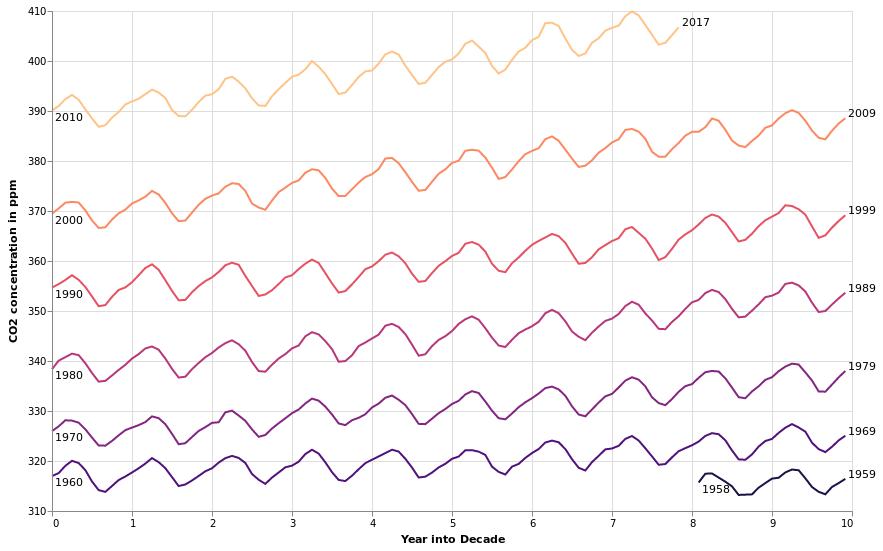

In [122]:
layerLineCO2 =
    let dvals = dataFromUrl "data/co2-concentration.csv"
                   [Parse [("Date", FoUtc "%Y-%m-%d")]]
                   
        trans = transform
                   . calculateAs "year(datum.Date)" "year"
                   . calculateAs "floor(datum.year / 10)" "decade"
                   . calculateAs "(datum.year % 10) + (month(datum.Date)/12)" "scaled_date"
                   . window [ ([WOp FirstValue, WField "scaled_date"], "first_date")
                            , ([WOp LastValue, WField "scaled_date"], "last_date")
                            ]
                            [ WSort [WAscending "scaled_date"]
                            , WGroupBy ["decade"]
                            , WFrame Nothing Nothing]
           . calculateAs "datum.first_date === datum.scaled_date ? 'first' : datum.last_date === datum.scaled_date ? 'last' : null"
                                 "end"

        enc = encoding
                 . position X [ PName "scaled_date", PmType Quantitative
                              , PAxis [AxTitle "Year into Decade", AxTickCount 11]
                              ]
                 . position Y [ PName "CO2", PmType Quantitative, PScale [SZero False]
                              , PTitle "CO2 concentration in ppm"
                              ]
       
        tenc = encoding (text [TName "year", TmType Nominal] [])
        
        enc1 = encoding
                  . color [MName "decade", MmType Ordinal, MScale [SScheme "magma" []], MLegend []]

        mkLayer equal bline = [ transform (filter (FEqual "end" (Str equal)) [])
                              , mark Text [MBaseline bline]
                              , encoding (text [TName "year", TmType Nominal] [])
                              ]  

        lyr1 = [mark Line [], enc1 []]
        lyr2 = mkLayer "first" AlignTop
        lyr3 = mkLayer "last" AlignBottom
        lyrs = map asSpec [lyr1, lyr2, lyr3]
    
        conf = configure
                 . configuration (TextStyle [MAlign AlignLeft, MdX 3, MdY 1])
                 
    in toVegaLite [dvals, width 800, height 500, trans [], enc [], layer lyrs, conf []]

vlShow layerLineCO2

In [123]:
validate layerLineCO2Spec layerLineCO2

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Line Chart Showing Ranks Over Time

From https://vega.github.io/vega-lite/examples/window_rank.html

In [124]:
windowRankSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "title": {
    "text": "World Cup 2018: Group F Rankings",
    "frame": "bounds"
  },
  "data": {
    "values": [
      {"team": "Germany", "matchday": 1, "point": 0, "diff": -1},
      {"team": "Mexico", "matchday": 1, "point": 3, "diff": 1},
      {"team": "South Korea", "matchday": 1, "point": 0, "diff": -1},
      {"team": "Sweden", "matchday": 1, "point": 3, "diff": 1},
      {"team": "Germany", "matchday": 2, "point": 3, "diff": 0},
      {"team": "Mexico", "matchday": 2, "point": 6, "diff": 2},
      {"team": "South Korea", "matchday": 2, "point": 0, "diff": -2},
      {"team": "Sweden", "matchday": 2, "point": 3, "diff": 0},
      {"team": "Germany", "matchday": 3, "point": 3, "diff": -2},
      {"team": "Mexico", "matchday": 3, "point": 6, "diff": -1},
      {"team": "South Korea", "matchday": 3, "point": 3, "diff": 0},
      {"team": "Sweden", "matchday": 3, "point": 6, "diff": 3}
    ]
  },
  "transform": [{
    "sort": [
      {"field": "point", "order": "descending"},
      {"field": "diff", "order": "descending"}
    ],
    "window": [{
      "op": "rank",
      "as": "rank"
    }],
    "groupby": ["matchday"]
  }],
  "mark": {"type": "line", "orient": "vertical"},
  "encoding": {
    "x": {"field": "matchday", "type": "ordinal"},
    "y": {"field": "rank", "type": "ordinal"},
    "color": {
      "field": "team", "type": "nominal",
      "scale": {
        "domain": ["Germany", "Mexico", "South Korea", "Sweden"],
        "range": ["black", "#127153", "#C91A3C", "#0C71AB"]
      }
    }
  }
}
|]

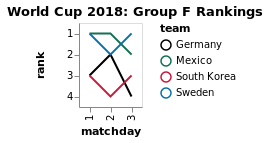

In [125]:
data Team = GER | MEX | SKR | SWE

toTeam GER = "Germany"
toTeam MEX = "Mexico"
toTeam SKR = "South Korea"
toTeam SWE = "Sweden"

windowRank =
    let titleOpts = title "World Cup 2018: Group F Rankings"
                          [TFrame FrBounds]
    
        dvals = dataFromRows []
                  . mkRow GER 1 0 (-1)
                  . mkRow MEX 1 3 1
                  . mkRow SKR 1 0 (-1)
                  . mkRow SWE 1 3 1
                  . mkRow GER 2 3 0
                  . mkRow MEX 2 6 2
                  . mkRow SKR 2 0 (-2)  
                  . mkRow SWE 2 3 0
                  . mkRow GER 3 3 (-2)
                  . mkRow MEX 3 6 (-1)
                  . mkRow SKR 3 3 0  
                  . mkRow SWE 3 6 3

        mkRow t m p d = dataRow [("team", Str (toTeam t)), ("matchday", Number m), ("point", Number p), ("diff", Number d)]
        
        trans = transform
                  . window [([WOp Rank], "rank")]
                           [WGroupBy ["matchday"], WSort [WDescending "point", WDescending "diff"]]
    
        markOpts = mark Line [MOrient Vertical]
        
        scales = categoricalDomainMap [ (toTeam GER, "black")
                                      , (toTeam MEX, "#127153")
                                      , (toTeam SKR, "#C91A3C")
                                      , (toTeam SWE, "#0C71AB") ]
                                      
        enc = encoding
                . position X [PName "matchday", PmType Ordinal]
                . position Y [PName "rank", PmType Ordinal]
                . color [MName "team", MmType Nominal, MScale scales]

    in toVegaLite [titleOpts, dvals [], trans [], markOpts, enc []]
    
vlShow windowRank

In [126]:
validate windowRankSpec windowRank

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Drawing Sine and Cosine Curves with the Sequence Generator

From https://vega.github.io/vega-lite/examples/sequence_line.html

In [127]:
sequenceLineSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Plots a function using a generated sequence.",
  "width": 300,
  "height": 150,
  "data": {
    "sequence": {
      "start": 0,
      "stop": 12.7,
      "step": 0.1,
      "as": "u"
    }
  },
  "transform": [
    {
      "calculate": "sin(datum.u)",
      "as": "v"
    },
    {
      "calculate": "cos(datum.u)",
      "as": "w"
    }
  ],
  "layer": [
    {
      "mark": "line",
      "encoding": {
        "x": {
          "field": "u",
          "type": "quantitative",
          "title": "x"
        },
        "y": {
          "field": "v",
          "type": "quantitative",
          "title": "sin(x)"
        }
      }
    },
    {
      "mark": {
        "type": "line",
        "stroke": "firebrick"
      },
      "encoding": {
        "x": {
          "field": "u",
          "type": "quantitative"
        },
        "y": {
          "field": "w",
          "type": "quantitative",
          "title": "cos(x)"
        }
      }
    }
  ]
}
|]

In [128]:
sequenceLine =
    let desc = "Plots a function using a generated sequence."
        dvals = dataSequenceAs 0 12.7 0.1 "u"
        
        trans = transform
                  . calculateAs "sin(datum.u)" "v"
                  . calculateAs "cos(datum.u)" "w"
                  
        enc field mxtitle ytitle = encoding
                 . position X ([PName "u", PmType Quantitative] ++ maybe [] (\t -> [PTitle t]) mxtitle)
                 . position Y [PName field, PmType Quantitative, PTitle ytitle]
        
        enc1 = enc "v" (Just "x") "sin(x)" []
        enc2 = enc "w" Nothing    "cos(x)" []

        spec1 = asSpec [mark Line [], enc1]
        spec2 = asSpec [mark Line [MStroke "firebrick"], enc2]
        
        lyr = layer [spec1, spec2]

    in toVegaLite [description desc, width 300, height 150, dvals, trans [], lyr]

In [129]:
vlShow sequenceLine

In [130]:
validate sequenceLineSpec sequenceLine

Okay

Return to the [Table of Contents](#Table-of-Contents).

---

## Area Charts and Streamgraphs
 
 - [Area Chart](#Area-Chart)
 - [Area Chart with Overlaying Lines and Point Markers](#Area-Chart-with-Overlaying-Lines-and-Point-Markers)
 - [Stacked Area Chart](#Stacked-Area-Chart)
 - [Normalized Stacked Area Chart](#Normalized-Stacked-Area-Chart)
 - [Streamgraph](#Streamgraph)
 - [Horizon Graph](#Horizon-Graph)
 - [Mosaic Chart with Labels](#Mosaic-Chart-with-Labels)
 
---

### Area Chart

From https://vega.github.io/vega-lite/examples/area.html

In [131]:
areaSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "width": 300,
  "height": 200,
  "data": {"url": "data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date", "type": "temporal",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count", "type": "quantitative",
      "axis": {"title": "count"}
    }
  }
}
|]

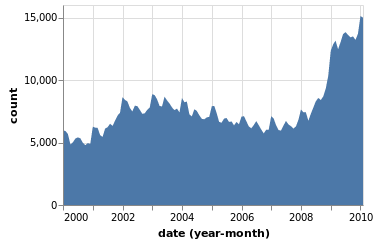

In [132]:
area =
    let dvals = dataFromUrl "data/unemployment-across-industries.json"
           
        enc = encoding
                 . position X [ PName "date", PmType Temporal
                              , PTimeUnit YearMonth, PAxis [AxFormat "%Y"]]
                 . position Y [ PName "count", PmType Quantitative
                              , PAggregate Sum, PAxis [AxTitle "count"]]

    in toVegaLite [width 300, height 200, dvals [], mark Area [], enc []]
       
vlShow area

In [133]:
validate areaSpec area

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Area Chart with Overlaying Lines with Overlaying Lines and Point Markers

From https://vega.github.io/vega-lite/examples/area_overlay.html

In [134]:
areaOverlaySpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Google's stock price over time.",
  "data": {"url": "data/stocks.csv"},
  "transform": [{"filter": "datum.symbol==='GOOG'"}],
  "mark": {"type": "area", "line": true, "point": true},
  "encoding": {
    "x": {"field": "date", "type": "temporal"},
    "y": {"field": "price", "type": "quantitative"}
  }
}
|]

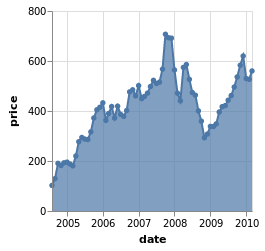

In [135]:
areaOverlay =
    let label = description "Google's stock price over time."
        dvals = dataFromUrl "data/stocks.csv" []
        
        trans = transform
                  . filter (FExpr "datum.symbol==='GOOG'")
    
        markOpt = mark Area [MLine (LMMarker []), MPoint (PMMarker [])]
        
        enc = encoding
                . position X [PName "date", PmType Temporal]
                . position Y [PName "price", PmType Quantitative]
         
    in toVegaLite [label, dvals, trans [], markOpt, enc []]

vlShow areaOverlay

In [136]:
validate areaOverlaySpec areaOverlay

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Stacked Area Chart

From https://vega.github.io/vega-lite/examples/stacked_area.html

In [137]:
stackedAreaSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Area chart showing weight of cars over time.",
  "width": 300, "height": 200,
  "data": {"url": "data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date", "type": "temporal",
      "axis": {"format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count", "type": "quantitative"
    },
    "color": {
      "field": "series",
      "type": "nominal",
      "scale": {"scheme": "category20b"}
    }
  }
}
|]

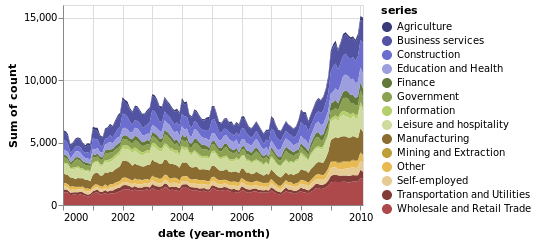

In [138]:
stackedArea =
    let dvals = dataFromUrl "data/unemployment-across-industries.json"
        desc = "Area chart showing weight of cars over time."
                   
        enc = encoding
                 . position X [ PName "date", PmType Temporal
                              , PTimeUnit YearMonth
                              , PAxis [AxFormat "%Y"] 
                              ]
                 . position Y [PName "count", PmType Quantitative, PAggregate Sum]
                 . color [ MName "series", MmType Nominal
                         , MScale [SScheme "category20b" []]
                         ]
                 
    in toVegaLite [ description desc, width 300, height 200
                  , dvals [], mark Area [], enc []]
       
vlShow stackedArea

In [139]:
validate stackedAreaSpec stackedArea

Okay

Return to the [Table of Contents](#Table-of-Contents).

## Normalized Stacked Area Chart

From https://vega.github.io/vega-lite/examples/stacked_area_normalize.html

In [140]:
stackedAreaNormalizeSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/unemployment-across-industries.json"},
  "width": 300, "height": 200,
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date", "type": "temporal",
      "axis": {"domain": false, "format": "%Y"}
    },
    "y": {
      "aggregate": "sum", "field": "count", "type": "quantitative",
      "axis": null,
      "stack": "normalize"

    },
    "color": {"field":"series", "type":"nominal", "scale":{"scheme": "category20b"}}
  }
}
|]

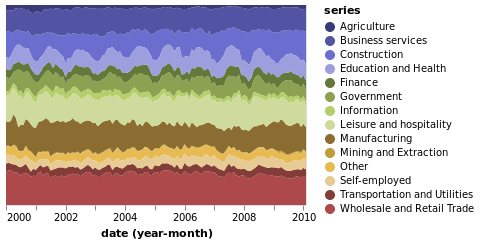

In [141]:
stackedAreaNormalize =
    let dvals = dataFromUrl "data/unemployment-across-industries.json"
                   
        enc = encoding
                 . position X [ PName "date", PmType Temporal
                              , PTimeUnit YearMonth
                              , PAxis [AxDomain False, AxFormat "%Y"] 
                              ]
                 . position Y [ PName "count", PmType Quantitative
                              , PAggregate Sum
                              , PStack StNormalize
                              , PAxis []
                              ]
                 . color [ MName "series", MmType Nominal
                         , MScale [SScheme "category20b" []]
                         ]
                 
    in toVegaLite [ width 300, height 200
                  , dvals [], mark Area [], enc []]
       
vlShow stackedAreaNormalize

In [142]:
validate stackedAreaNormalizeSpec stackedAreaNormalize

Okay

Return to the [Table of Contents](#Table-of-Contents).

## Streamgraph

From https://vega.github.io/vega-lite/examples/stacked_area_stream.html

In [143]:
stackedAreaStreamSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "width": 300, "height": 200,
  "data": {"url": "data/unemployment-across-industries.json"},
  "mark": "area",
  "encoding": {
    "x": {
      "timeUnit": "yearmonth", "field": "date", "type": "temporal",
      "axis": {"domain": false, "format": "%Y", "tickSize": 0}
    },
    "y": {
      "aggregate": "sum", "field": "count", "type": "quantitative",
      "axis": null,
      "stack": "center"
    },
    "color": {"field":"series", "type":"nominal", "scale":{"scheme": "category20b"}}
  }
}
|]

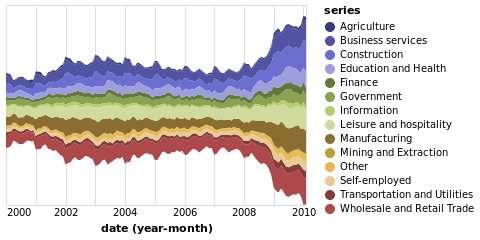

In [144]:
stackedAreaStream =
    let dvals = dataFromUrl "data/unemployment-across-industries.json"
                   
        enc = encoding
                 . position X [ PName "date", PmType Temporal
                              , PTimeUnit YearMonth
                              , PAxis [AxDomain False, AxFormat "%Y", AxTickSize 0] 
                              ]
                 . position Y [ PName "count", PmType Quantitative
                              , PAggregate Sum
                              , PStack StCenter
                              , PAxis []
                              ]
                 . color [ MName "series", MmType Nominal
                         , MScale [SScheme "category20b" []]
                         ]
                 
    in toVegaLite [ width 300, height 200
                  , dvals [], mark Area [], enc []]
       
vlShow stackedAreaStream

In [145]:
validate stackedAreaStreamSpec stackedAreaStream

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Horizon Graph

From https://vega.github.io/vega-lite/examples/area_horizon.html

In [146]:
areaHorizonSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Horizon Graph with 2 layers. (See https://idl.cs.washington.edu/papers/horizon/ for more details on Horizon Graphs.)",
  "width": 300,
  "height": 50,
  "data": {
    "values": [
      {"x": 1,  "y": 28}, {"x": 2,  "y": 55},
      {"x": 3,  "y": 43}, {"x": 4,  "y": 91},
      {"x": 5,  "y": 81}, {"x": 6,  "y": 53},
      {"x": 7,  "y": 19}, {"x": 8,  "y": 87},
      {"x": 9,  "y": 52}, {"x": 10, "y": 48},
      {"x": 11, "y": 24}, {"x": 12, "y": 49},
      {"x": 13, "y": 87}, {"x": 14, "y": 66},
      {"x": 15, "y": 17}, {"x": 16, "y": 27},
      {"x": 17, "y": 68}, {"x": 18, "y": 16},
      {"x": 19, "y": 49}, {"x": 20, "y": 15}
    ]
  },
  "layer": [{
    "mark": {"type": "area", "clip": true, "orient": "vertical"},
    "encoding": {
      "x": {
        "field": "x", "type": "quantitative",
        "scale": {"zero": false, "nice": false}
      },
      "y": {
        "field": "y", "type": "quantitative",
        "scale": {"domain": [0,50]}
      },
      "opacity": {"value": 0.6}
    }
  }, {
    "transform": [
      {
        "calculate": "datum.y - 50",
        "as": "ny"
      }
    ],
    "mark": {"type": "area", "clip": true, "orient": "vertical"},
    "encoding": {
      "x": {
        "field": "x", "type": "quantitative"
      },
      "y": {
        "field": "ny", "type": "quantitative",
        "scale": {"domain": [0,50]},
        "axis": {"title": "y"}
      },
      "opacity": {"value": 0.3}
    }
  }],
  "config": {
    "area": {"interpolate": "monotone"}
  }
}
|]

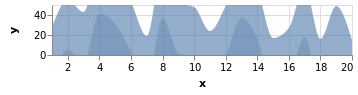

In [147]:
areaHorizon =
    let desc = "Horizon Graph with 2 layers. (See https://idl.cs.washington.edu/papers/horizon/ for more details on Horizon Graphs.)"

        dvals = dataFromColumns []
                   . dataColumn "x" (Numbers [1..20])
                   . dataColumn "y" (Numbers [ 28, 55, 43, 91, 81, 53, 19, 87, 52, 48
                                             , 24, 49, 87, 66, 17, 27, 68, 16, 49, 15
                                             ])

        enc1 = encoding
                  . position X [PName "x", PmType Quantitative, PScale [SZero False, SNice (IsNice False)]]
                  . position Y [PName "y", PmType Quantitative, PScale [SDomain (DNumbers [0, 50])]]
                  . opacity [MNumber 0.6]
        enc2 = encoding
                  . position X [PName "x", PmType Quantitative]
                  . position Y [PName "ny", PmType Quantitative, PScale [SDomain (DNumbers [0, 50])], PAxis [AxTitle "y"]]
                  . opacity [MNumber 0.3]
           
        marea = mark Area [MClip True, MOrient Vertical]

        trans2 = transform
                    . calculateAs "datum.y - 50" "ny" 
                    
        lyr1 = asSpec [marea, enc1 []]
        lyr2 = asSpec [trans2 [], marea, enc2 []]
           
        conf = configure
                  . configuration (AreaStyle [MInterpolate Monotone])
                  
    in toVegaLite [description desc, width 300, height 50, dvals [], layer [lyr1, lyr2], conf []]
       
vlShow areaHorizon

In [148]:
validate areaHorizonSpec areaHorizon

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Mosaic Chart with Labels

From https://vega.github.io/vega-lite/examples/rect_mosaic_labelled_with_offset.html

I have changed the JSON from this example to make the validation work - 
`"mark": "rect"` has the same meaning has `"mark": {"type": "rect"}` and `hvega`
creates the former (when there are no Mark options), but the original version of the
JSON used the latter. Similarly, I have changed `"stroke": ""` to `"stroke": null`.

In [149]:
rectMosaicLabelledWithOffsetSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {
    "url": "data/cars.json"
  },
  "transform": [
    {
      "aggregate": [
        {
          "op": "count",
          "as": "count_*"
        }
      ],
      "groupby": [
        "Origin",
        "Cylinders"
      ]
    },
    {
      "stack": "count_*",
      "groupby": [],
      "as": [
        "stack_count_Origin1",
        "stack_count_Origin2"
      ],
      "offset": "normalize",
      "sort": [
        {
          "field": "Origin",
          "order": "ascending"
        }
      ]
    },
    {
      "window": [
        {
          "op": "min",
          "field": "stack_count_Origin1",
          "as": "x"
        },
        {
          "op": "max",
          "field": "stack_count_Origin2",
          "as": "x2"
        },
        {
          "op": "dense_rank",
          "as": "rank_Cylinders"
        },
        {
          "op": "distinct",
          "field": "Cylinders",
          "as": "distinct_Cylinders"
        }
      ],
      "groupby": [
        "Origin"
      ],
      "frame": [
        null,
        null
      ],
      "sort": [
        {
          "field": "Cylinders",
          "order": "ascending"
        }
      ]
    },
    {
      "window": [
        {
          "op": "dense_rank",
          "as": "rank_Origin"
        }
      ],
      "frame": [
        null,
        null
      ],
      "sort": [
        {
          "field": "Origin",
          "order": "ascending"
        }
      ]
    },
    {
      "stack": "count_*",
      "groupby": [
        "Origin"
      ],
      "as": [
        "y",
        "y2"
      ],
      "offset": "normalize",
      "sort": [
        {
          "field": "Cylinders",
          "order": "ascending"
        }
      ]
    },
    {
      "calculate": "datum.y + (datum.rank_Cylinders - 1) * datum.distinct_Cylinders * 0.01 / 3",
      "as": "ny"
    },
    {
      "calculate": "datum.y2 + (datum.rank_Cylinders - 1) * datum.distinct_Cylinders * 0.01 / 3",
      "as": "ny2"
    },
    {
      "calculate": "datum.x + (datum.rank_Origin - 1) * 0.01",
      "as": "nx"
    },
    {
      "calculate": "datum.x2 + (datum.rank_Origin - 1) * 0.01",
      "as": "nx2"
    },
    {
      "calculate": "(datum.nx+datum.nx2)/2",
      "as": "xc"
    },
    {
      "calculate": "(datum.ny+datum.ny2)/2",
      "as": "yc"
    }
  ],
  "vconcat": [
    {
      "mark": {
        "type": "text",
        "baseline": "middle",
        "align": "center"
      },
      "encoding": {
        "x": {
          "aggregate": "min",
          "field": "xc",
          "type": "quantitative",
          "title": "Origin",
          "axis": {
            "orient": "top"
          }
        },
        "color": {
          "field": "Origin",
          "type": "nominal",
          "legend": null
        },
        "text": {
          "field": "Origin",
          "type": "nominal"
        }
      }
    },
    {
      "layer": [
        {
          "mark": "rect",
          "encoding": {
            "x": {
              "field": "nx",
              "type": "quantitative",
              "axis": null
            },
            "x2": {
              "field": "nx2"
            },
            "y": {
              "field": "ny",
              "type": "quantitative",
              "axis": null
            },
            "y2": {
              "field": "ny2"
            },
            "color": {
              "field": "Origin",
              "type": "nominal",
              "legend": null
            },
            "opacity": {
              "field": "Cylinders",
              "type": "quantitative",
              "legend": null
            },
            "tooltip": [
              {
                "field": "Origin",
                "type": "nominal"
              },
              {
                "field": "Cylinders",
                "type": "quantitative"
              }
            ]
          }
        },
        {
          "mark": {
            "type": "text",
            "baseline": "middle"
          },
          "encoding": {
            "x": {
              "field": "xc",
              "type": "quantitative",
              "axis": null
            },
            "y": {
              "field": "yc",
              "type": "quantitative",
              "axis": {
                "title": "Cylinders"
              }
            },
            "text": {
              "field": "Cylinders",
              "type": "nominal"
            }
          }
        }
      ]
    }
  ],
  "resolve": {
    "scale": {
      "x": "shared"
    }
  },
  "config": {
    "view": {
      "stroke": null
    },
    "concat": {"spacing": 10},
    "axis": {
      "domain": false,
      "ticks": false,
      "labels": false,
      "grid": false
    }
  }
}
|]

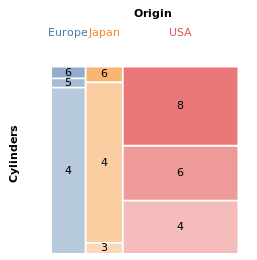

In [150]:
rectMosaicLabelledWithOffset =
    let dvals = dataFromUrl "data/cars.json" []
    
        trans = transform
                 . aggregate [opAs Count "" "count_*"] ["Origin", "Cylinders"]
                 . stack "count_*" [] "stack_count_Origin1" "stack_count_Origin2"
                                   [ StOffset StNormalize
                                   , StSort [WAscending "Origin"]
                                   ]
                 . window [ ([WAggregateOp Min, WField "stack_count_Origin1"], "x") 
                          , ([WAggregateOp Max, WField "stack_count_Origin2"], "x2")
                          , ([WOp DenseRank], "rank_Cylinders")
                          , ([WAggregateOp Distinct, WField "Cylinders"], "distinct_Cylinders") 
                          ]
                          [ WFrame Nothing Nothing
                          , WGroupBy ["Origin"]
                          , WSort [WAscending "Cylinders"] ]
                 . window [ ([WOp DenseRank], "rank_Origin") ]
                          [ WFrame Nothing Nothing, WSort [WAscending "Origin"] ]
                 . stack "count_*" ["Origin"] "y" "y2"
                                   [ StOffset StNormalize
                                   , StSort [WAscending "Cylinders"]
                                   ]
                 . calculateAs "datum.y + (datum.rank_Cylinders - 1) * datum.distinct_Cylinders * 0.01 / 3" "ny"
                 . calculateAs "datum.y2 + (datum.rank_Cylinders - 1) * datum.distinct_Cylinders * 0.01 / 3" "ny2"
                 . calculateAs "datum.x + (datum.rank_Origin - 1) * 0.01" "nx"
                 . calculateAs "datum.x2 + (datum.rank_Origin - 1) * 0.01" "nx2"
                 . calculateAs "(datum.nx+datum.nx2)/2" "xc"
                 . calculateAs "(datum.ny+datum.ny2)/2" "yc"

        enc1 = encoding
                 . position X [ PName "xc", PmType Quantitative, PTitle "Origin"
                              , PAggregate Min, PAxis [AxOrient STop] ]
                 . color [MName "Origin", MmType Nominal, MLegend []]
                 . text [TName "Origin", TmType Nominal]
        
        enc21 = encoding
                  . position X  [PName "nx", PmType Quantitative, PAxis []]
                  . position X2 [PName "nx2"]
                  . position Y  [PName "ny", PmType Quantitative, PAxis []]
                  . position Y2 [PName "ny2"]
                  . color [MName "Origin", MmType Nominal, MLegend []]
                  . opacity [MName "Cylinders", MmType Quantitative, MLegend []]
                  . tooltips [ [TName "Origin", TmType Nominal]
                             , [TName "Cylinders", TmType Quantitative] ]

        enc22 = encoding
                  . position X [PName "xc", PmType Quantitative, PAxis []]
                  . position Y [PName "yc", PmType Quantitative, PAxis [AxTitle "Cylinders"]]
                  . text [TName "Cylinders", TmType Nominal]
                  
        spec1 = [ mark Text [MBaseline AlignMiddle, MAlign AlignCenter]
                , enc1 []
                ]

        lyr1 = [ mark Rect []
               , enc21 [] ]
        lyr2 = [ mark Text [MBaseline AlignMiddle]
               , enc22 [] ]
  
        spec2 = [layer [asSpec lyr1, asSpec lyr2]]
        spec = [asSpec spec1, asSpec spec2]
        
        reslv = resolve
                  . resolution (RScale [(ChX, Shared)])

        conf = configure
                  . configuration (View [ViewStroke Nothing])
                  . configuration (ConcatStyle [ConcatSpacing 10])
                  . configuration (Axis [Domain False, Ticks False, Labels False, Grid False])

    in toVegaLite [dvals, trans [], vConcat spec, reslv [], conf []]

vlShow rectMosaicLabelledWithOffset

In [151]:
validate rectMosaicLabelledWithOffsetSpec rectMosaicLabelledWithOffset

Okay

Return to the [Table of Contents](#Table-of-Contents).

---

## Table-based Plots 

 - [Table Heatmap](#Table-Heatmap)
 - [Annual Weather Heatmap](#Annual-Weather-Heatmap)
 - [Table Binned Heatmap](#Table-Binned-Heatmap)
 - [Table Bubble Plot (Github Punch Card)](#Table-Bubble-Plot-%28Github-Punch-Card%29)
 - [Layering text over heatmap](#Layering-text-over-heatmap)

---

### Table Heatmap

From https://vega.github.io/vega-lite/examples/rect_heatmap.html

In [152]:
rectHeatmapSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/cars.json"},
  "mark": "rect",
  "encoding": {
    "y": {"field": "Origin", "type": "nominal"},
    "x": {"field": "Cylinders", "type": "ordinal"},
    "color": {"aggregate": "mean", "field": "Horsepower", "type": "quantitative"}
  }
}
|]

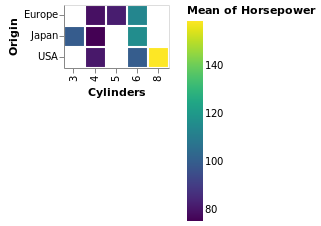

In [153]:
rectHeatmap =
    let dvals = dataFromUrl "data/cars.json"
           
        enc = encoding
                 . position Y [PName "Origin", PmType Nominal]
                 . position X [PName "Cylinders", PmType Ordinal]
                 . color [MName "Horsepower", MmType Quantitative, MAggregate Mean]
                 
    in toVegaLite [dvals [], mark Rect [], enc []]
       
vlShow rectHeatmap

In [154]:
validate rectHeatmapSpec rectHeatmap

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Annual Weather Heatmap

From https://vega.github.io/vega-lite/examples/rect_heatmap_weather.html

In [155]:
rectHeatmapWeatherSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {
      "url": "data/seattle-temps.csv"
  },
  "title": "2010 Daily Max Temperature (F) in Seattle, WA",
  "config": {
      "view": {
          "strokeWidth": 0
      },
      "scale": {
          "rangeStep": 13
      },
      "axis": {
          "domain": false
      }
  },
  "mark": "rect",
  "encoding": {
      "x": {
          "field": "date",
          "timeUnit": "date",
          "type": "ordinal",
          "title": "Day",
          "axis": {
              "labelAngle": 0,
              "format": "%e"
          }
      },
      "y": {
          "field": "date",
          "timeUnit": "month",
          "type": "ordinal",
          "title": "Month"
      },
      "color": {
          "field": "temp",
          "aggregate": "max",
          "type": "quantitative",
          "legend": {
              "title": null
          }
      }
  }
}
|]

In [156]:
rectHeatmapWeather =
    let dvals = dataFromUrl "data/seattle-temps.csv" []
        label = title "2010 Daily Max Temperature (F) in Seattle, WA" []
        
        conf = configure
                 . configuration (View [ViewStrokeWidth 0])
                 . configuration (Scale [SCRangeStep (Just 13)])
                 . configuration (Axis [Domain False])
    
        enc = encoding
                 . position X [ PName "date", PTimeUnit Date, PmType Ordinal
                              , PTitle "Day", PAxis [AxLabelAngle 0, AxFormat "%e"] ]
                 . position Y [ PName "date", PTimeUnit Month, PmType Ordinal
                              , PTitle "Month" ]
                 . color [ MName "temp", MAggregate Max, MmType Quantitative
                         , MLegend [LNoTitle]]
                         
    in toVegaLite [dvals, label, conf [], mark Rect [], enc []]
    
vlShow rectHeatmapWeather

In [157]:
validate rectHeatmapWeatherSpec rectHeatmapWeather

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Table Binned Heatmap

From https://vega.github.io/vega-lite/examples/rect_binned_heatmap.html

In [158]:
rectBinnedHeatmapSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/movies.json"},
  "transform": [{
    "filter": {"and": [
      {"field": "IMDB_Rating", "valid": true},
      {"field": "Rotten_Tomatoes_Rating", "valid": true}
    ]}
  }],
  "mark": "rect",
  "width": 300,
  "height": 200,
  "encoding": {
    "x": {
      "bin": {"maxbins":60},
      "field": "IMDB_Rating",
      "type": "quantitative"
    },
    "y": {
      "bin": {"maxbins": 40},
      "field": "Rotten_Tomatoes_Rating",
      "type": "quantitative"
    },
    "color": {
      "aggregate": "count",
      "type": "quantitative"
    }
  },
  "config": {
    "view": {
      "stroke": "transparent"
    }
  }
}
|]

In [159]:
rectBinnedHeatmap =
    let dvals = dataFromUrl "data/movies.json" []
           
        enc = encoding
                 . position X [PName "IMDB_Rating", PmType Quantitative, PBin [MaxBins 60]]
                 . position Y [PName "Rotten_Tomatoes_Rating", PmType Quantitative, PBin [MaxBins 40]]
                 . color [MAggregate Count, MmType Quantitative]
        
        -- prior to hvega 0.4.0.0 Stroke was used instead of ViewStroke
        config = configure
                    . configuration (View [ViewStroke (Just "transparent")])

        -- this expression was not easily expressed in hvega prior to 0.4.0.0
        valid1 = FilterOp (FValid "IMDB_Rating")
        valid2 = FilterOp (FValid "Rotten_Tomatoes_Rating")
        trans = transform
                  . filter (FCompose (And valid1 valid2))
                  
    in toVegaLite [ dvals, trans [], mark Rect [], width 300, height 200
                  , enc [], config []]
       
vlShow rectBinnedHeatmap

In [160]:
validate rectBinnedHeatmapSpec rectBinnedHeatmap

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Table Bubble Plot (Github Punch Card)

From https://vega.github.io/vega-lite/examples/circle_github_punchcard.html

In [161]:
circleGithubPunchcardSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Punchcard Visualization like on Github. The day on y-axis uses a custom order from Monday to Sunday.  The sort property supports both full day names (e.g., 'Monday') and their three letter initials (e.g., 'mon') -- both of which are case insensitive.",
  "data": { "url": "data/github.csv"},
  "mark": "circle",
  "encoding": {
    "y": {
      "field": "time",
      "type": "ordinal",
      "timeUnit": "day",
      "sort": ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
    },
    "x": {
      "field": "time",
      "type": "ordinal",
      "timeUnit": "hours"
    },
    "size": {
      "field": "count",
      "type": "quantitative",
      "aggregate": "sum"
    }
  }
}
|]

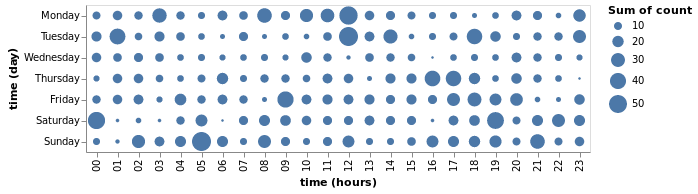

In [162]:
circleGithubPunchcard =
    let dvals = dataFromUrl "data/github.csv"
        label = description ("Punchcard Visualization like on Github. The day on y-axis uses a custom order " <>
                             "from Monday to Sunday.  The sort property supports both full day names (e.g., 'Monday') " <>
                             "and their three letter initials (e.g., 'mon') -- both of which are case insensitive.")
        
        weekDays = Strings ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
        enc = encoding
                 . position X [PName "time", PmType Ordinal, PTimeUnit Hours]
                 . position Y [ PName "time", PmType Ordinal, PTimeUnit Day
                               , PSort [CustomSort weekDays] ]
                 . size [MName "count", MAggregate Sum, MmType Quantitative]
                 
    in toVegaLite [ label, dvals [], mark Circle [], enc [] ]
       
vlShow circleGithubPunchcard

In [163]:
validate circleGithubPunchcardSpec circleGithubPunchcard

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Layering text over heatmap

From https://vega.github.io/vega-lite/examples/layer_text_heatmap.html

In [164]:
layerTextHeatmapSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/cars.json"},
  "transform": [
    {
      "aggregate": [{"op": "count", "as": "num_cars"}],
      "groupby": ["Origin", "Cylinders"]
    }
  ],
  "encoding": {
    "y": {"field": "Origin", "type": "ordinal"},
    "x": {"field": "Cylinders", "type": "ordinal"}
  },
  "layer": [
    {
      "mark": "rect",
      "encoding": {
        "color": {
          "field": "num_cars",
          "type": "quantitative",
          "title": "Count of Records",
          "legend": {"direction": "horizontal", "gradientLength": 120}
        }
      }
    },
    {
      "mark": "text",
      "encoding": {
        "text": {"field": "num_cars", "type": "quantitative"},
        "color": {
          "condition": {"test": "datum['num_cars'] < 40", "value": "black"},
          "value": "white"
        }
      }
    }
  ],
  "config": {
    "scale": {"bandPaddingInner": 0, "bandPaddingOuter": 0},
    "text": {"baseline": "middle"}
  }
}
|]

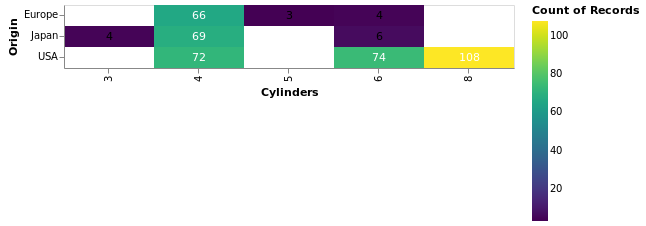

In [165]:
layerTextHeatmap =
    let dvals = dataFromUrl "data/cars.json"

        trans = transform
                  . aggregate [opAs Count "" "num_cars"]
                              ["Origin", "Cylinders"]

        enc = encoding
                 . position Y [PName "Origin", PmType Ordinal]
                 . position X [PName "Cylinders", PmType Ordinal]

        enc1 = encoding
                  . color [ MName "num_cars", MmType Quantitative
                          , MTitle "Count of Records"
                          , MLegend [LDirection Horizontal, LGradientLength 120]
                          ]
        enc2 = encoding
                  . text [TName "num_cars", TmType Quantitative]
                  . color [ MDataCondition [(Expr "datum['num_cars'] < 40",
                                            [MString "black"])]
                            [MString "white"]
                          ]
                          
        lyr1 = asSpec [mark Rect [], enc1 []]
        lyr2 = asSpec [mark Text [], enc2 []]
           
        conf = configure
                  . configuration (Scale [SCBandPaddingInner 0, SCBandPaddingOuter 0])
                  . configuration (TextStyle [MBaseline AlignMiddle])
                  
    in toVegaLite [dvals [], trans [], enc [], layer [lyr1, lyr2], conf []]
       
vlShow layerTextHeatmap

In [166]:
validate layerTextHeatmapSpec layerTextHeatmap

Okay

Return to the [Table of Contents](#Table-of-Contents).

---

## Advanced Calculations

 - [Calculate Percentage of Total](#Calculate-Percentage-of-Total)
 - [Calculate Difference from Average](#Calculate-Difference-from-Average)
 - [Calculate Difference from Annual Average](#Calculate-Difference-from-Annual-Average)
 - [Calculate Residuals](#Calculate-Residuals)
 - [Line Charts Showing Ranks over Time](#Line-Charts-Showing-Ranks-over-Time) (from the "Line Charts" section)
 - [Waterfall Chart of Monthly Profit and Loss](#Waterfall-Chart-of-Monthly-Profit-and-Loss)
 - [Filtering top-K items](#Filtering-top-K-items)
 - [Top-K plot with Others](#Top-K-plot-with-Others)
 - [Using the lookup transform to combine data](#Using-the-lookup-transform-to-combine-data)
 - [Cumulative Frequency Distribution](#Cumulative-Frequency-Distribution)
 - [Layered Histogram and Cumulative Histogram](#Layered-Histogram-and-Cumulative-Histogram)
 - [Parallel Coordinate Plot](#Parallel-Coorinate-Plot)
 - [Bar Chart showing Argmax Value](#Bar-Chart-showing-Argmax-Value)
 
 ---

### Calculate Percentage of Total

From https://vega.github.io/vega-lite/examples/window_percent_of_total.html

In [167]:
windowPercentOfTotalSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A bar graph showing what activites consume what percentage of the day.",
  "data": {
    "values": [
      {"Activity": "Sleeping", "Time": 8},
      {"Activity": "Eating", "Time": 2},
      {"Activity": "TV", "Time": 4},
      {"Activity": "Work", "Time": 8},
      {"Activity": "Exercise", "Time": 2}
    ]
  },
  "transform": [{
    "window": [{
      "op": "sum",
      "field": "Time",
      "as": "TotalTime"
    }],
    "frame": [null, null]
  },
  {
    "calculate": "datum.Time/datum.TotalTime * 100",
    "as": "PercentOfTotal"
  }],
  "mark": "bar",
  "encoding": {
    "x": {
      "field": "PercentOfTotal",
      "type": "quantitative",
      "axis": {
        "title": "% of total Time"
      }
    },
    "y": {
      "field": "Activity",
      "type": "nominal",
      "scale": {
        "rangeStep": 12
      }
    }
  }
}
|]

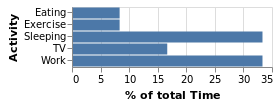

In [168]:
windowPercentOfTotal =
    let label = description "A bar graph showing what activites consume what percentage of the day."
        dvals = dataFromRows []
                  . mkRow "Sleeping" 8
                  . mkRow "Eating" 2
                  . mkRow "TV" 4
                  . mkRow "Work" 8
                  . mkRow "Exercise" 2
                  
        mkRow a t = dataRow [("Activity", Str a), ("Time", Number t)]
   
        trans = transform
                  . window [([WAggregateOp Sum, WField "Time"], "TotalTime")]
                           [WFrame Nothing Nothing]
                  . calculateAs "datum.Time/datum.TotalTime * 100" "PercentOfTotal"

        markOpts = mark Bar []
        
        enc = encoding
                . position X [PName "PercentOfTotal", PmType Quantitative, PAxis [AxTitle "% of total Time"]]
                . position Y [PName "Activity", PmType Nominal, PScale [SRangeStep (Just 12)]]
                
    in toVegaLite [label, dvals [], trans [], markOpts, enc []]
    
vlShow windowPercentOfTotal    

In [169]:
validate windowPercentOfTotalSpec windowPercentOfTotal

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Calculate Difference from Average

From https://vega.github.io/vega-lite/examples/joinaggregate_mean_difference.html

Note that I've tweaked the spec slightly, setting the x encoding in the second
layer to have an aggregate of `"mean"` rather than `"average"`. It means the same
thing, but doesn't trigger an error from my validate function.

In [170]:
joinaggregateMeanDifferenceSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/movies.json"},
  "transform": [
    {"filter": "datum.IMDB_Rating != null"},
    {
      "joinaggregate": [{
        "op": "mean",
        "field": "IMDB_Rating",
        "as": "AverageRating"
      }]
    },
    {"filter": "(datum.IMDB_Rating - datum.AverageRating) > 2.5"}
  ],
  "layer": [
    {
      "mark": "bar",
      "encoding": {
        "x": {
          "field": "IMDB_Rating", "type": "quantitative",
          "axis": {"title": "IMDB Rating"}
        },
        "y": {"field": "Title", "type": "ordinal"}
      }
    },
    {
      "mark": {"type": "rule", "color": "red"},
      "encoding": {
        "x": {
          "aggregate": "mean",
          "field": "AverageRating",
          "type": "quantitative"
        }
      }
    }
  ]
}
|]

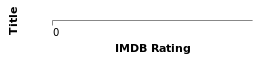

In [171]:
joinaggregateMeanDifference =
    let dvals = dataFromUrl "data/movies.json" []
    
        trans = transform
                  . filter (FExpr "datum.IMDB_Rating != null")
                  . joinAggregate [opAs Mean "IMDB_Rating" "AverageRating"] []
                  . filter (FExpr "(datum.IMDB_Rating - datum.AverageRating) > 2.5")
    
        enc1 = encoding
                 . position X [PName "IMDB_Rating", PmType Quantitative, PAxis [AxTitle "IMDB Rating"]]
                 . position Y [PName "Title", PmType Ordinal]
                 
        enc2 = encoding
                 . position X [PName "AverageRating", PmType Quantitative, PAggregate Mean]
                 
        lyr1 = [mark Bar [], enc1 []]
        lyr2 = [mark Rule [MColor "red"], enc2 []]
        lyr = layer [asSpec lyr1, asSpec lyr2]
        
    in toVegaLite [dvals, trans [], lyr]
    
vlShow joinaggregateMeanDifference

In [172]:
validate joinaggregateMeanDifferenceSpec joinaggregateMeanDifference

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Calculate Difference from Annual Average

From https://vega.github.io/vega-lite/examples/joinaggregate_mean_difference_by_year.html

In [173]:
joinaggregateMeanDifferenceByYearSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Bar graph showing the best films for the year they were produced, where best is defined by at least 2.5 points above average for that year. The red point shows the average rating for a film in that year, and the bar is the rating that the film recieved.",
  "data": {
    "url": "data/movies.json"
  },
  "transform": [
      {"filter": "datum.IMDB_Rating != null"},
      {"timeUnit": "year", "field": "Release_Date", "as": "year"},
      {
        "joinaggregate": [{
          "op": "mean",
          "field": "IMDB_Rating",
          "as": "AverageYearRating"
        }],
        "groupby": [
          "year"
        ]
      },
      {
        "filter": "(datum.IMDB_Rating - datum.AverageYearRating) > 2.5"
      }
  ],
  "layer": [{
      "mark": {"type": "bar", "clip": true},
      "encoding": {
        "x": {
          "field": "IMDB_Rating",
          "type": "quantitative",
          "axis": {"title": "IMDB Rating"}
        },
        "y": {
          "field": "Title",
          "type": "ordinal"
        }
      }
    },
    {
      "mark": "tick",
      "encoding": {
        "x": {
          "field": "AverageYearRating",
          "type": "quantitative"
        },
        "y": {
          "field": "Title",
          "type": "ordinal"
        },
        "color": {"value": "red"}
      }
    }
  ]
}
|]

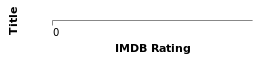

In [174]:
joinaggregateMeanDifferenceByYear =
    let label = description "Bar graph showing the best films for the year they were produced, where best is defined by at least 2.5 points above average for that year. The red point shows the average rating for a film in that year, and the bar is the rating that the film recieved."
        dvals = dataFromUrl "data/movies.json" []
        
        trans = transform
                  . filter (FExpr "datum.IMDB_Rating != null")
                  . timeUnitAs Year "Release_Date" "year"
                  . joinAggregate [opAs Mean "IMDB_Rating" "AverageYearRating"] [WGroupBy ["year"]]
                  . filter (FExpr "(datum.IMDB_Rating - datum.AverageYearRating) > 2.5")
    
        enc1 = encoding
                 . position X [PName "IMDB_Rating", PmType Quantitative, PAxis [AxTitle "IMDB Rating"]]
                 . position Y [PName "Title", PmType Ordinal]
                 
        enc2 = encoding
                 . position X [PName "AverageYearRating", PmType Quantitative]
                 . position Y [PName "Title", PmType Ordinal]
                 . color [MString "red"]
                 
        lyr1 = [mark Bar [MClip True], enc1 []]
        lyr2 = [mark Tick [], enc2 []]
        lyr = layer [asSpec lyr1, asSpec lyr2]
        
    in toVegaLite [label, dvals, trans [], lyr]
    
vlShow joinaggregateMeanDifferenceByYear

In [175]:
validate joinaggregateMeanDifferenceByYearSpec joinaggregateMeanDifferenceByYear

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Calculate Residuals

From https://vega.github.io/vega-lite/examples/joinaggregate_residual_graph.html

In [176]:
joinaggregateResidualGraphSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A dot plot showing each movie in the database, and the difference from the average movie rating. The display is sorted by year to visualize everything in sequential order. The graph is for all Movies before 2019.",
  "data": {
    "url": "data/movies.json"
  },
  "transform": [
    {"filter": "datum.IMDB_Rating != null"},
    {"filter": {"timeUnit": "year", "field": "Release_Date", "range": [null, 2019]}},
    {
      "joinaggregate": [{
        "op": "mean",
        "field": "IMDB_Rating",
        "as": "AverageRating"
      }]
    },
    {
      "calculate": "datum.IMDB_Rating - datum.AverageRating",
      "as": "RatingDelta"
    }
  ],
  "mark": "point",
  "encoding": {
    "x": {
      "field": "Release_Date",
      "type": "temporal"
    },
    "y": {
      "field": "RatingDelta",
      "type": "quantitative",
      "axis": {"title": "Rating Delta"}
    }
  }
}
|]

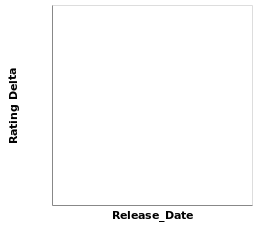

In [177]:
joinaggregateResidualGraph =
    let label = description "A dot plot showing each movie in the database, and the difference from the average movie rating. The display is sorted by year to visualize everything in sequential order. The graph is for all Movies before 2019."
        dvals = dataFromUrl "data/movies.json" []
        
        trans = transform
                  . filter (FExpr "datum.IMDB_Rating != null")
                  
                  -- as discussed below, I am not 100% convinced that this is
                  -- semantically the same as the original, but it seems to be
                  --                  
                  . filter (FRange "Release_Date" (DateRange [] [DTYear 2019]))
                  
                  . joinAggregate [opAs Mean "IMDB_Rating" "AverageRating"] []
                  . calculateAs "datum.IMDB_Rating - datum.AverageRating" "RatingDelta"
    
        enc = encoding
                . position X [PName "Release_Date", PmType Temporal]
                . position Y [PName "RatingDelta", PmType Quantitative, PAxis [AxTitle "Rating Delta"]]
        
    in toVegaLite [label, dvals, mark Point [], trans [], enc []]
    
vlShow joinaggregateResidualGraph

We can not create the /exact/ specification with `hvega-0.4.0.0`, as shown below, but we can
create the same visualization. The difference here is that the example uses

```
    {"filter": {"timeUnit": "year", "field": "Release_Date", "range": [null, 2019]}},
```

but we have to encode this as

```
    filter (FRange "Release_Date" (DateRange [] [DTYear 2019]))
```

which creates the following, which I __believe__ to have the same meaning as above:

```
    {"filter": {"field": "Release_Date", "range": [null, {"year": 2019}]}},
```

Please [let me know](https://github.com/DougBurke/hvega/issues) if this is not correct!

In [178]:
validate joinaggregateResidualGraphSpec joinaggregateResidualGraph

The visualization and expected specification do not match.

Values are different for "transform"
  Expected: Array [Object (fromList [("filter",String "datum.IMDB_Rating != null")]),Object (fromList [("filter",Object (fromList [("field",String "Release_Date"),("timeUnit",String "year"),("range",Array [Null,Number 2019.0])]))]),Object (fromList [("joinaggregate",Array [Object (fromList [("op",String "mean"),("as",String "AverageRating"),("field",String "IMDB_Rating")])])]),Object (fromList [("as",String "RatingDelta"),("calculate",String "datum.IMDB_Rating - datum.AverageRating")])]
  Found   : Array [Object (fromList [("filter",String "datum.IMDB_Rating != null")]),Object (fromList [("filter",Object (fromList [("field",String "Release_Date"),("range",Array [Null,Object (fromList [("year",Number 2019.0)])])]))]),Object (fromList [("joinaggregate",Array [Object (fromList [("op",String "mean"),("as",String "AverageRating"),("field",String "IMDB_Rating")])])]),Object (fromList [("as",Strin

Return to the [Table of Contents](#Table-of-Contents).

### Waterfall Chart of Monthly Profit and Loss

From https://vega.github.io/vega-lite/examples/waterfall_chart.html

I have slightly-edited the Vega-Lite spec, to change `[{..}]` to `{..}`
in the last "condition" entry, since they have the same meaning
and `hvega` produces the latter when `MDataCondition` is given a list
with only one entry. This is purely so that `validate` does not complain,
and it does not change the semantics of the specification.

In [179]:
waterfallChartSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {
    "values": [
      {"label": "Begin", "amount": 4000},
      {"label": "Jan", "amount": 1707},
      {"label": "Feb", "amount": -1425},
      {"label": "Mar", "amount": -1030},
      {"label": "Apr", "amount": 1812},
      {"label": "May", "amount": -1067},
      {"label": "Jun", "amount": -1481},
      {"label": "Jul", "amount": 1228},
      {"label": "Aug", "amount": 1176},
      {"label": "Sep", "amount": 1146},
      {"label": "Oct", "amount": 1205},
      {"label": "Nov", "amount": -1388},
      {"label": "Dec", "amount": 1492},
      {"label": "End", "amount": 0}
    ]
  },
  "width": 800,
  "height": 450,
  "transform": [
    {"window": [{"op": "sum", "field": "amount", "as": "sum"}]},
    {"window": [{"op": "lead", "field": "label", "as": "lead"}]},
    {
      "calculate": "datum.lead === null ? datum.label : datum.lead",
      "as": "lead"
    },
    {
      "calculate": "datum.label === 'End' ? 0 : datum.sum - datum.amount",
      "as": "previous_sum"
    },
    {
      "calculate": "datum.label === 'End' ? datum.sum : datum.amount",
      "as": "amount"
    },
    {
      "calculate": "(datum.label !== 'Begin' && datum.label !== 'End' && datum.amount > 0 ? '+' : '') + datum.amount",
      "as": "text_amount"
    },
    {"calculate": "(datum.sum + datum.previous_sum) / 2", "as": "center"},
    {
      "calculate": "datum.sum < datum.previous_sum ? datum.sum : ''",
      "as": "sum_dec"
    },
    {
      "calculate": "datum.sum > datum.previous_sum ? datum.sum : ''",
      "as": "sum_inc"
    }
  ],
  "encoding": {
    "x": {
      "field": "label",
      "type": "ordinal",
      "sort": null,
      "axis": {"labelAngle": 0, "title": "Months"}
    }
  },
  "layer": [
    {
      "mark": {"type": "bar", "size": 45},
      "encoding": {
        "y": {
          "field": "previous_sum",
          "type": "quantitative",
          "title": "Amount"
        },
        "y2": {"field": "sum"},
        "color": {
          "condition": [
            {
              "test": "datum.label === 'Begin' || datum.label === 'End'",
              "value": "#f7e0b6"
            },
            {"test": "datum.sum < datum.previous_sum", "value": "#f78a64"}
          ],
          "value": "#93c4aa"
        }
      }
    },
    {
      "mark": {
        "type": "rule",
        "color": "#404040",
        "opacity": 1,
        "strokeWidth": 2,
        "xOffset": -22.5,
        "x2Offset": 22.5
      },
      "encoding": {
        "x2": {"field": "lead"},
        "y": {"field": "sum", "type": "quantitative"}
      }
    },
    {
      "mark": {"type": "text", "dy": -4, "baseline": "bottom"},
      "encoding": {
        "y": {"field": "sum_inc", "type": "quantitative"},
        "text": {"field": "sum_inc", "type": "nominal"}
      }
    },
    {
      "mark": {"type": "text", "dy": 4, "baseline": "top"},
      "encoding": {
        "y": {"field": "sum_dec", "type": "quantitative"},
        "text": {"field": "sum_dec", "type": "nominal"}
      }
    },
    {
      "mark": {"type": "text", "fontWeight": "bold", "baseline": "middle"},
      "encoding": {
        "y": {"field": "center", "type": "quantitative"},
        "text": {"field": "text_amount", "type": "nominal"},
        "color": {
          "condition":
            {
              "test": "datum.label === 'Begin' || datum.label === 'End'",
              "value": "#725a30"
            }
          ,
          "value": "white"
        }
      }
    }
  ],
  "config": {"text": {"fontWeight": "bold", "color": "#404040"}}
}
|]

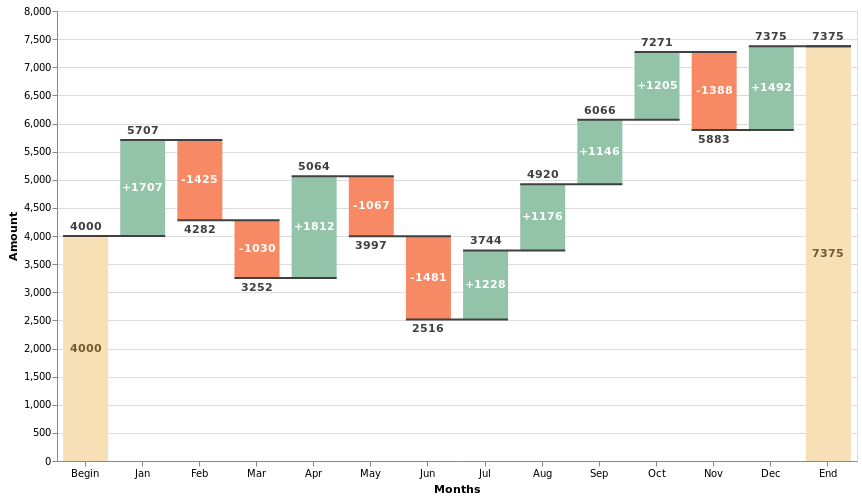

In [180]:
waterfallChart =
    let dvals = dataFromRows []
                  . mkRow "Begin" 4000
                  . mkRow "Jan" 1707
                  . mkRow "Feb" (-1425)
                  . mkRow "Mar" (-1030)
                  . mkRow "Apr" 1812
                  . mkRow "May" (-1067)
                  . mkRow "Jun" (-1481)
                  . mkRow "Jul" 1228
                  . mkRow "Aug" 1176
                  . mkRow "Sep" 1146
                  . mkRow "Oct" 1205
                  . mkRow "Nov" (-1388)
                  . mkRow "Dec" 1492
                  . mkRow "End" 0
                  
        mkRow l a = dataRow [("label", Str l), ("amount", Number a)]

        trans = transform
                  . window [([WAggregateOp Sum, WField "amount"], "sum")] []
                  . window [([WOp Lead, WField "label"], "lead")] []
                  . calculateAs "datum.lead === null ? datum.label : datum.lead"
                                "lead"
                  . calculateAs "datum.label === 'End' ? 0 : datum.sum - datum.amount"
                                "previous_sum"
                  . calculateAs "datum.label === 'End' ? datum.sum : datum.amount"
                                "amount"
                  . calculateAs "(datum.label !== 'Begin' && datum.label !== 'End' && datum.amount > 0 ? '+' : '') + datum.amount"
                                "text_amount"
                  . calculateAs "(datum.sum + datum.previous_sum) / 2"
                                "center"
                  . calculateAs "datum.sum < datum.previous_sum ? datum.sum : ''"
                                "sum_dec"
                  . calculateAs "datum.sum > datum.previous_sum ? datum.sum : ''"
                                "sum_inc"

        enc = encoding
                . position X [ PName "label", PmType Ordinal, PSort []
                             , PAxis [AxLabelAngle 0, AxTitle "Months"] ]

        conf = configure
                 . configuration (TextStyle [MFontWeight Bold, MColor "#404040"])

        enc1 = encoding
                 . position Y [PName "previous_sum", PmType Quantitative, PTitle "Amount"]
                 . position Y2 [PName "sum"]
                 . color [MDataCondition [ (Expr "datum.label === 'Begin' || datum.label === 'End'", [MString "#f7e0b6"])
                                         , (Expr "datum.sum < datum.previous_sum", [MString "#f78a64"])
                                         ]
                                         [MString "#93c4aa"]
                                         ]
                                         
        lyr1 = [mark Bar [MSize 45], enc1 []]

        markOpts2 = mark Rule [MColor "#404040", MOpacity 1, MStrokeWidth 2, MXOffset (-22.5), MX2Offset 22.5]
        enc2 = encoding
                 . position X2 [PName "lead"]
                 . position Y [PName "sum", PmType Quantitative]
                 
        lyr2 = [markOpts2, enc2 []]
        
        markOpts3 = mark Text [MdY (-4), MBaseline AlignBottom]
        enc3 = encoding
                 . position Y [PName "sum_inc", PmType Quantitative]
                 . text [TName "sum_inc", TmType Nominal]
                 
        lyr3 = [markOpts3, enc3 []]
        
        markOpts4 = mark Text [MdY 4, MBaseline AlignTop]
        enc4 = encoding
                 . position Y [PName "sum_dec", PmType Quantitative]
                 . text [TName "sum_dec", TmType Nominal]
                 
        lyr4 = [markOpts4, enc4 []]
        
        markOpts5 = mark Text [MFontWeight Bold, MBaseline AlignMiddle]
        enc5 = encoding
                 . position Y [PName "center", PmType Quantitative]
                 . text [TName "text_amount", TmType Nominal]
                 . color [ MDataCondition
                           [ (Expr "datum.label === 'Begin' || datum.label === 'End'", [MString "#725a30"])]
                           [MString "white"]
                         ]

        lyr5 = [markOpts5, enc5 []]
        
        lyr = layer (map asSpec [lyr1, lyr2, lyr3, lyr4, lyr5])

    in toVegaLite [dvals [], width 800, height 450, trans [], enc [], lyr, conf []]
    
vlShow waterfallChart

In [181]:
validate waterfallChartSpec waterfallChart

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Filtering top-K items

From https://vega.github.io/vega-lite/examples/window_top_k.html

The Vega-Lite specification has been adjusted to change `"average"` to `"mean"`
in the sort options. This is purely a syntactic change (since `hvega` only
supports the `Mean` label as of version `0.4.0.0`).

In [182]:
windowTopKSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "A bar graph showing the scores of the top 5 students. This shows an example of the window transform, for how the top K (5) can be filtered, and also how a rank can be computed for each student.",
  "data": {
    "values": [
      {"student": "A", "score": 100}, {"student": "B", "score": 56},
      {"student": "C", "score": 88}, {"student": "D", "score": 65},
      {"student": "E", "score": 45}, {"student": "F", "score": 23},
      {"student": "G", "score": 66}, {"student": "H", "score": 67},
      {"student": "I", "score": 13}, {"student": "J", "score": 12},
      {"student": "K", "score": 50}, {"student": "L", "score": 78},
      {"student": "M", "score": 66}, {"student": "N", "score": 30},
      {"student": "O", "score": 97}, {"student": "P", "score": 75},
      {"student": "Q", "score": 24}, {"student": "R", "score": 42},
      {"student": "S", "score": 76}, {"student": "T", "score": 78},
      {"student": "U", "score": 21}, {"student": "V", "score": 46}
    ]
  },
  "transform": [
    {
      "window": [{
        "op": "rank",
        "as": "rank"
      }],
      "sort": [{ "field": "score", "order": "descending" }]
    }, {
      "filter": "datum.rank <= 5"
    }
  ],
  "mark": "bar",
  "encoding": {
    "x": {
        "field": "score",
        "type": "quantitative"
    },
    "y": {
        "field": "student",
        "type": "nominal",
        "sort": {"field": "score", "op": "mean", "order":"descending"}
    }
  }
}
|]

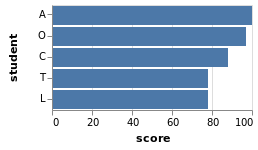

In [183]:
windowTopK =
    let label = description "A bar graph showing the scores of the top 5 students. This shows an example of the window transform, for how the top K (5) can be filtered, and also how a rank can be computed for each student."

        -- we can generate the student labels automatically; it might be
        -- a bit clearer to to create a Value and then pass to dataFromJson,
        -- but this way lets me validate the output against the specification.
        --
        dvals = dataFromRows [] rows
        rows = foldr ($) [] (zipWith mkRow ['A' ..] scores)
        scores = [ 100, 56, 88, 65, 45, 23, 66, 67, 13, 12, 50
                 , 78, 66, 30, 97, 75, 24, 42, 76, 78, 21, 46 ]
        mkRow student score = dataRow [("student", Str (T.singleton student)), ("score", Number score)]

        trans = transform
                  . window [([WOp Rank], "rank")]
                           [WSort [WDescending "score"]]
                  . filter (FExpr "datum.rank <= 5")
        
        enc = encoding
                . position X [PName "score", PmType Quantitative]
                . position Y [ PName "student", PmType Nominal,
                               PSort [ByFieldOp "score" Mean, Descending]
                             ]
    in toVegaLite [label, dvals, trans [], mark Bar [], enc []]

vlShow windowTopK

In [184]:
validate windowTopKSpec windowTopK

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Top-K plot with Others

From https://vega.github.io/vega-lite/examples/window_top_k_others.html

In [185]:
windowTopKOthersSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Top-K plot with \"others\" by Trevor Manz, adapted from https://observablehq.com/@manzt/top-k-plot-with-others-vega-lite-example.",
  "title": "Top Directors by Average Worldwide Gross",
  "data": {"url": "data/movies.json"},
  "mark": "bar",
  "transform": [
    {
      "aggregate": [{"op": "mean", "field": "Worldwide_Gross", "as": "aggregate_gross"}],
      "groupby": ["Director"]
    },
    {
      "window": [{"op": "row_number", "as": "rank"}],
      "sort": [{ "field": "aggregate_gross", "order": "descending" }]
    },
    {
      "calculate": "datum.rank < 10 ? datum.Director : 'All Others'", "as": "ranked_director"
    }
  ],
  "encoding": {
    "x": {
      "aggregate": "mean",
      "field": "aggregate_gross",
      "type": "quantitative",
      "title": null
    },
    "y": {
      "sort": {"op": "mean", "field": "aggregate_gross", "order": "descending"},
      "field": "ranked_director",
      "type": "ordinal",
      "title": null
    }
  }
}
|]

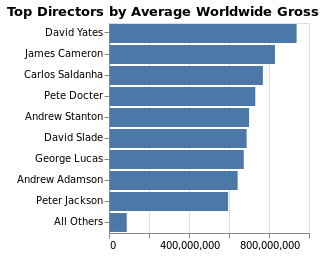

In [186]:
windowTopKOthers =
    let label = description "Top-K plot with \"others\" by Trevor Manz, adapted from https://observablehq.com/@manzt/top-k-plot-with-others-vega-lite-example."
        titleOpts = title "Top Directors by Average Worldwide Gross" []
        
        dvals = dataFromUrl "data/movies.json" []
        
        trans = transform
                  . aggregate [opAs Mean "Worldwide_Gross" "aggregate_gross"]
                              ["Director"]
                  . window [([WOp RowNumber], "rank")]
                           [WSort [WDescending "aggregate_gross"]]
                  . calculateAs "datum.rank < 10 ? datum.Director : 'All Others'"
                                "ranked_director"
 
        enc = encoding
                . position X [PName "aggregate_gross", PmType Quantitative, PAggregate Mean, PNoTitle]
                . position Y [ PName "ranked_director", PmType Ordinal
                             , PNoTitle
                             , PSort [ByFieldOp "aggregate_gross" Mean, Descending]]
        
    in toVegaLite [label, titleOpts, dvals, mark Bar [], trans [], enc []]
    
vlShow windowTopKOthers

In [187]:
validate windowTopKOthersSpec windowTopKOthers

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Using the lookup transform to combine data

From https://vega.github.io/vega-lite/examples/lookup.html

In [188]:
lookup2Spec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/lookup_groups.csv"},
  "transform": [{
    "lookup": "person",
    "from": {
      "data": {"url": "data/lookup_people.csv"},
      "key": "name",
      "fields": ["age", "height"]
    }
  }],
  "mark": "bar",
  "encoding": {
    "x": {"field": "group", "type": "ordinal"},
    "y": {"field": "age", "aggregate": "mean", "type": "quantitative"}
  }
}
|]

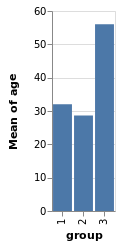

In [189]:
lookup2 =
    let dvals = dataFromUrl "data/lookup_groups.csv" []
        dvals2 = dataFromUrl "data/lookup_people.csv" []
        
        trans = transform
                  . lookup "person" dvals2 "name" ["age", "height"]
        
        enc = encoding
                  . position X [PName "group", PmType Ordinal]
                  . position Y [PName "age", PmType Quantitative, PAggregate Mean]
                  
    in toVegaLite [dvals, trans [], mark Bar [], enc []]
    
vlShow lookup2

In [190]:
validate lookup2Spec lookup2

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Cumulative Frequency Distribution

From https://vega.github.io/vega-lite/examples/area_cumulative_freq.html

I have tweaked the Vega-Lite specification to include the optional `"order": "ascending"` entry
for the sorting of the `IMDB_Rating` field, as `hvega` includes this but it is the default
value so is not specified in the example.

In [191]:
areaCumulativeFreqSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/movies.json"},
  "transform": [{
    "sort": [{"field": "IMDB_Rating", "order": "ascending"}],
    "window": [{"op": "count", "field": "count", "as": "cumulative_count"}],
    "frame": [null, 0]
  }],
  "mark": "area",
  "encoding": {
    "x": {
      "field": "IMDB_Rating",
      "type": "quantitative"
    },
    "y": {
      "field": "cumulative_count",
      "type": "quantitative"
    }
  }
}
|]

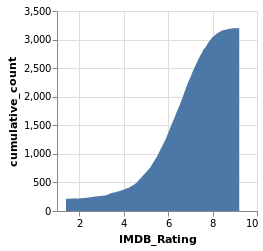

In [192]:
areaCumulativeFreq =
    let dvals = dataFromUrl "data/movies.json" []
        trans = transform
                  . window [([WAggregateOp Count, WField "count"], "cumulative_count")]
                           [WFrame Nothing (Just 0), WSort [WAscending "IMDB_Rating"]]
        enc = encoding
                 . position X [PName "IMDB_Rating", PmType Quantitative]
                 . position Y [PName "cumulative_count", PmType Quantitative]
    in toVegaLite [dvals, trans [], mark Area [], enc []]
    
vlShow areaCumulativeFreq

In [193]:
validate areaCumulativeFreqSpec areaCumulativeFreq

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Layered Histogram and Cumulative Histogram

From https://vega.github.io/vega-lite/examples/layer_cumulative_histogram.html

I have tweaked the Vega-Lite specification to include the optional `"order": "ascending"` entry
for the sorting of the `bin_IMDB_Rating` field, as `hvega` includes this but it is the default
value so is not specified in the example..

In [194]:
layerCumulativeHistogramSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "data": {"url": "data/movies.json"},
  "transform": [{
    "bin": true,
    "field": "IMDB_Rating",
    "as": "bin_IMDB_Rating"
  }, {
    "aggregate": [{"op": "count", "as": "count"}],
    "groupby": ["bin_IMDB_Rating", "bin_IMDB_Rating_end"]
  }, {
    "filter": "datum.bin_IMDB_Rating !== null"
  }, {
    "sort": [{"field": "bin_IMDB_Rating", "order": "ascending"}],
    "window": [{"op": "sum", "field": "count", "as": "cumulative_count"}],
    "frame": [null, 0]
  }],
  "encoding": {
    "x": {
      "field": "bin_IMDB_Rating", "type": "quantitative",
      "scale": {"zero": false},
      "title": "IMDB Rating"
    },
    "x2": {"field": "bin_IMDB_Rating_end"}
  },
  "layer": [{
    "mark": "bar",
    "encoding": {
      "y": {"field": "cumulative_count", "type": "quantitative"}
    }
  }, {
    "mark": {"type": "bar", "color": "yellow", "opacity": 0.5},
    "encoding": {
      "y": {"field": "count", "type": "quantitative"}
    }
  }]
}
|]

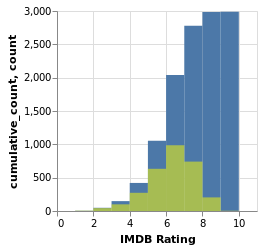

In [195]:
layerCumulativeHistogram =
    let dvals = dataFromUrl "data/movies.json" []
    
        trans = transform
                  . binAs [] "IMDB_Rating" "bin_IMDB_Rating"
                  . aggregate [opAs Count "" "count"] ["bin_IMDB_Rating", "bin_IMDB_Rating_end"]
                  . filter (FExpr "datum.bin_IMDB_Rating !== null")
                  . window [([WAggregateOp Sum, WField "count"], "cumulative_count")]
                           [WFrame Nothing (Just 0), WSort [WAscending "bin_IMDB_Rating"]]
                  
        enc = encoding
                . position X [ PName "bin_IMDB_Rating", PmType Quantitative
                             , PScale [SZero False], PTitle "IMDB Rating" ]
                . position X2 [PName "bin_IMDB_Rating_end"]
        
        
        lyr1 = [ mark Bar []
               , encoding (position Y [PName "cumulative_count", PmType Quantitative] []) ]
        lyr2 = [ mark Bar [MColor "yellow", MOpacity 0.5]
               , encoding (position Y [PName "count", PmType Quantitative] []) ]
        
        lyr = layer [asSpec lyr1, asSpec lyr2]
    
    in toVegaLite [dvals, trans [], enc [], lyr]

vlShow layerCumulativeHistogram

In [196]:
validate layerCumulativeHistogramSpec layerCumulativeHistogram

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Parallel Coordinate Plot

From https://vega.github.io/vega-lite/examples/parallel_coordinate.html

In [197]:
parallelCoordinateSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "Though Vega-Lite supports only one scale per axes, one can create a parallel coordinate plot by folding variables, using `joinaggregate` to normalize their values and using ticks and rules to manually create axes.",
  "data": {
    "url": "data/iris.json"
  },
  "width": 600,
  "height": 300,
  "transform": [
    {"window": [{"op": "count", "as": "index"}]},
    {"fold": ["petalLength", "petalWidth", "sepalLength", "sepalWidth"]},
    {
      "joinaggregate": [
        {"op": "min", "field": "value", "as": "min"},
        {"op": "max", "field": "value", "as": "max"}
      ],
      "groupby": ["key"]
    },
    {
      "calculate": "(datum.value - datum.min) / (datum.max-datum.min)",
      "as": "norm_val"
    },
    {
      "calculate": "(datum.min + datum.max) / 2",
      "as": "mid"
    }
  ],
  "layer": [{
    "mark": {"type": "rule", "color": "#ccc", "tooltip": null},
    "encoding": {
      "detail": {"aggregate": "count", "type": "quantitative"},
      "x": {"type": "nominal", "field": "key"}
    }
  }, {
    "mark": "line",
    "encoding": {
      "color": {"type": "nominal", "field": "species"},
      "detail": {"type": "nominal", "field": "index"},
      "opacity": {"value": 0.3},
      "x": {"type": "nominal", "field": "key"},
      "y": {"type": "quantitative", "field": "norm_val", "axis": null},
      "tooltip": [{
        "type": "quantitative",
        "field": "petalLength"
      }, {
        "type": "quantitative",
        "field": "petalWidth"
      }, {
        "type": "quantitative",
        "field": "sepalLength"
      }, {
        "type": "quantitative",
        "field": "sepalWidth"
      }]
    }
  },{
    "encoding": {
      "x": {"type": "nominal", "field": "key"},
      "y": {"value": 0}
    },
    "layer": [{
      "mark": {"type": "text", "style": "label"},
      "encoding": {
        "text": {"aggregate": "max", "field": "max", "type": "quantitative"}
      }
    }, {
      "mark": {"type": "tick", "style": "tick", "size": 8, "color": "#ccc"}
    }]
  },{

    "encoding": {
      "x": {"type": "nominal", "field": "key"},
      "y": {"value": 150}
    },
    "layer": [{
      "mark": {"type": "text", "style": "label"},
      "encoding": {
        "text": {"aggregate": "min", "field": "mid", "type": "quantitative"}
      }
    }, {
      "mark": {"type": "tick", "style": "tick", "size": 8, "color": "#ccc"}
    }]
  },{
    "encoding": {
      "x": {"type": "nominal", "field": "key"},
      "y": {"value": 300}
    },
    "layer": [{
      "mark": {"type": "text", "style": "label"},
      "encoding": {
        "text": {"aggregate": "min", "field": "min", "type": "quantitative"}
      }
    }, {
      "mark": {"type": "tick", "style": "tick", "size": 8, "color": "#ccc"}
    }]
  }],
  "config": {
    "axisX": {"domain": false, "labelAngle": 0, "tickColor": "#ccc", "title": null},
    "view": {"stroke": null},
    "style": {
      "label": {"baseline": "middle", "align": "right", "dx": -5, "tooltip": null},
      "tick": {"orient": "horizontal", "tooltip": null}
    }
  }
}
|]

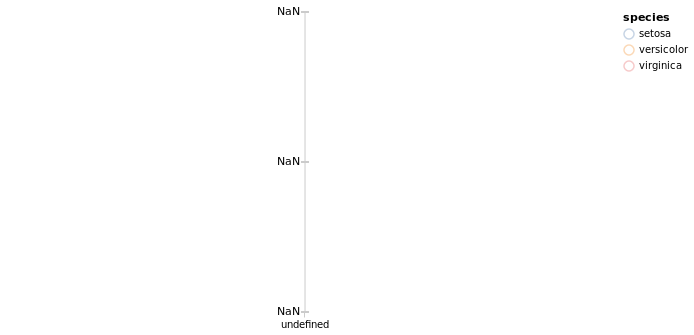

In [198]:
parallelCoordinate = 
    let label = description "Though Vega-Lite supports only one scale per axes, one can create a parallel coordinate plot by folding variables, using `joinaggregate` to normalize their values and using ticks and rules to manually create axes."
        dvals = dataFromUrl "data/iris.json" []

        trans = transform
                  . window [([WAggregateOp Count], "index")]
                           []
                  . fold ["petalLength", "petalWidth", "sepalLength", "sepalWidth"]
                  . joinAggregate [opAs Min "value" "min", opAs Max "value" "max"]
                                  [WGroupBy ["key"]]
                  . calculateAs "(datum.value - datum.min) / (datum.max-datum.min)"
                                "norm_val"
                  . calculateAs "(datum.min + datum.max) / 2"
                                "mid"

        xpos = position X [PName "key", PmType Nominal]
        enc1 = encoding
                 . detail [DAggregate Count, DmType Quantitative]
                 . xpos
                 
        lyr1 = [mark Rule [MColor "#ccc", MTooltip TTNone], enc1 []]

        enc2 = encoding
                 . color [MName "species", MmType Nominal]
                 . detail [DName "index", DmType Nominal]
                 . opacity [MNumber 0.3]
                 . xpos
                 . position Y [PName "norm_val", PmType Quantitative, PAxis []]
                 . tooltips (map (\n -> [TName n, TmType Quantitative])
                                 ["petalLength", "petalWidth", "sepalLength", "sepalWidth"]
                            )
                            
        lyr2 = [mark Line [], enc2 []]

        enc3 = encoding
                 . xpos
                 . position Y [PNumber 0]
                 
        lyr31 = [ mark Text [MStyle ["label"]]
                , encoding (text [TName "max", TmType Quantitative, TAggregate Max] []) ]
        lyr32 = [mark Tick [MStyle ["tick"], MSize 8, MColor "#ccc"]]
        
        lyr3a = layer (map asSpec [lyr31, lyr32])
        lyr3 = [enc3 [], lyr3a]

        enc4 = encoding
                 . xpos
                 . position Y [PNumber 150]
                 
        lyr41 = [ mark Text [MStyle ["label"]]
                , encoding (text [TName "mid", TmType Quantitative, TAggregate Min] []) ]
        lyr42 = [mark Tick [MStyle ["tick"], MSize 8, MColor "#ccc"]]
        
        lyr4a = layer (map asSpec [lyr41, lyr42])
        lyr4 = [enc4 [], lyr4a]

        enc5 = encoding
                 . xpos
                 . position Y [PNumber 300]
                 
        lyr51 = [ mark Text [MStyle ["label"]]
                , encoding (text [TName "min", TmType Quantitative, TAggregate Min] []) ]
        lyr52 = [mark Tick [MStyle ["tick"], MSize 8, MColor "#ccc"]]
        
        lyr5a = layer (map asSpec [lyr51, lyr52])
        lyr5 = [enc5 [], lyr5a]

        lyr = layer (map asSpec [lyr1, lyr2, lyr3, lyr4, lyr5])
        
        conf = configure
                 . configuration (AxisX [Domain False, LabelAngle 0, TickColor "#ccc", NoTitle])
                 . configuration (View [ViewStroke Nothing])
                 . configuration (NamedStyles [ ("label", [MBaseline AlignMiddle, MAlign AlignRight, MdX (-5), MTooltip TTNone])
                                              , ("tick", [MOrient Horizontal, MTooltip TTNone]) ])
                 
    in toVegaLite [label, dvals, height 300, width 600, trans [], lyr, conf []]
    
vlShow parallelCoordinate

In [199]:
validate parallelCoordinateSpec parallelCoordinate

Okay

Return to the [Table of Contents](#Table-of-Contents).

### Bar Chart showing Argmax Value

From https://vega.github.io/vega-lite/examples/bar_argmax.html

In [200]:
barArgmaxSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v3.json",
  "description": "The production budget of the movie that has the highest US Gross in each major genre.",
  "data": {"url": "data/movies.json"},
  "mark": "bar",
  "encoding": {
    "x": {"aggregate": {"argmax": "US_Gross"}, "field": "Production_Budget", "type": "quantitative"},
    "y": {"field": "Major_Genre", "type": "nominal"}
  }
}
|]

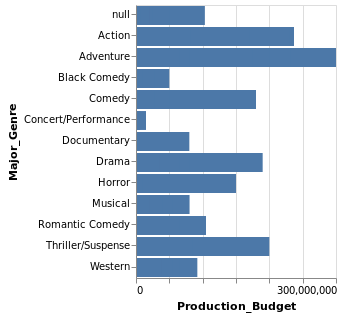

In [201]:
barArgmax =
    let label = description "The production budget of the movie that has the highest US Gross in each major genre."
        dvals = dataFromUrl "data/movies.json" []
        enc = encoding
               . position X [PName "Production_Budget", PmType Quantitative, PAggregate (ArgMax (Just "US_Gross"))]
               . position Y [PName "Major_Genre", PmType Nominal]
               
    in toVegaLite [label, dvals, mark Bar [], enc []]

vlShow barArgmax

In [202]:
validate barArgmaxSpec barArgmax

Okay

Return to the [Table of Contents](#Table-of-Contents).